In [1]:
## importing all the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, minmax_scale, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## model imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# evaluvation matrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

# saving the model 
import joblib
import os
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
data.shape

(233154, 41)

In [5]:
data.head() 

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
data.columns


Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [8]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [9]:
data['loan_default'].value_counts()


loan_default
0    182543
1     50611
Name: count, dtype: int64

In [10]:
data.duplicated().sum()


np.int64(0)

In [11]:
data.isnull().sum().sort_values(ascending=False)


Employment.Type                        7661
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
UniqueID                                  0
Date.of.Birth                             0
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [12]:
data['loan_default'].value_counts(normalize=True)


loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

In [13]:
emp_type_null = data[data['Employment.Type'].isna()]


In [14]:
emp_type_null['loan_default'].value_counts()


loan_default
0    6017
1    1644
Name: count, dtype: int64

In [15]:
emp_type_not_null = data[data['Employment.Type'].notna()]

emp_type_not_null['loan_default'].value_counts(normalize=True)


loan_default
0    0.782845
1    0.217155
Name: proportion, dtype: float64

In [16]:
data.nunique().sort_values(ascending=False)


UniqueID                               233154
PRI.CURRENT.BALANCE                     71341
PRI.DISBURSED.AMOUNT                    47909
asset_cost                              46252
PRI.SANCTIONED.AMOUNT                   44390
PRIMARY.INSTAL.AMT                      28067
disbursed_amount                        24565
Date.of.Birth                           15433
Current_pincode_ID                       6698
ltv                                      6579
Employee_code_ID                         3270
SEC.CURRENT.BALANCE                      3246
supplier_id                              2953
SEC.DISBURSED.AMOUNT                     2553
SEC.SANCTIONED.AMOUNT                    2223
SEC.INSTAL.AMT                           1918
PERFORM_CNS.SCORE                         573
CREDIT.HISTORY.LENGTH                     294
AVERAGE.ACCT.AGE                          192
PRI.NO.OF.ACCTS                           108
DisbursalDate                              84
branch_id                         

In [17]:
unique_df = pd.DataFrame({
    'column_name': data.columns,
    'data_type': data.dtypes.values,
    'unique_values': data.nunique().values
}).sort_values(by='unique_values', ascending=False)

unique_df


,column_name,data_type,unique_values
0,UniqueID,int64,233154
24,PRI.CURRENT.BALANCE,int64,71341
26,PRI.DISBURSED.AMOUNT,int64,47909
2,asset_cost,int64,46252
25,PRI.SANCTIONED.AMOUNT,int64,44390
33,PRIMARY.INSTAL.AMT,int64,28067
1,disbursed_amount,int64,24565
8,Date.of.Birth,object,15433
7,Current_pincode_ID,int64,6698
3,ltv,float64,6579


In [18]:
# Columns to drop based on analysis
cols_to_drop = ['UniqueID', 'MobileNo_Avl_Flag']

# Drop columns
data.drop(columns=cols_to_drop, inplace=True)


In [19]:
data.shape

(233154, 39)

In [20]:
data['Employment.Type'].value_counts()


Employment.Type
Self employed    127635
Salaried          97858
Name: count, dtype: int64

In [21]:
## filling the missing values in Employment.Type with 'Unknown'
data['Employment.Type'] = data['Employment.Type'].fillna('Unknown')



In [22]:
## check the missing values again
data.isnull().sum().sort_values(ascending=False)

disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AM

## Univariate Analysis – Target Variable

In [23]:
data['loan_default'].value_counts()
data['loan_default'].value_counts(normalize=True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

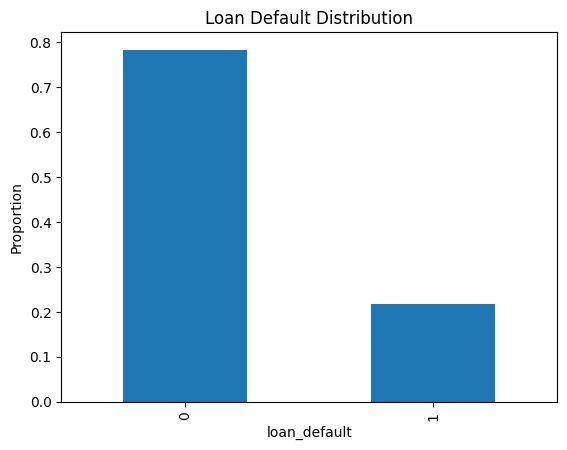

In [24]:
data['loan_default'].value_counts(normalize=True).plot(kind='bar')
plt.title('Loan Default Distribution')
plt.ylabel('Proportion')
plt.show()


### Univariate Analysis – Numerical Features

In [25]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_default')


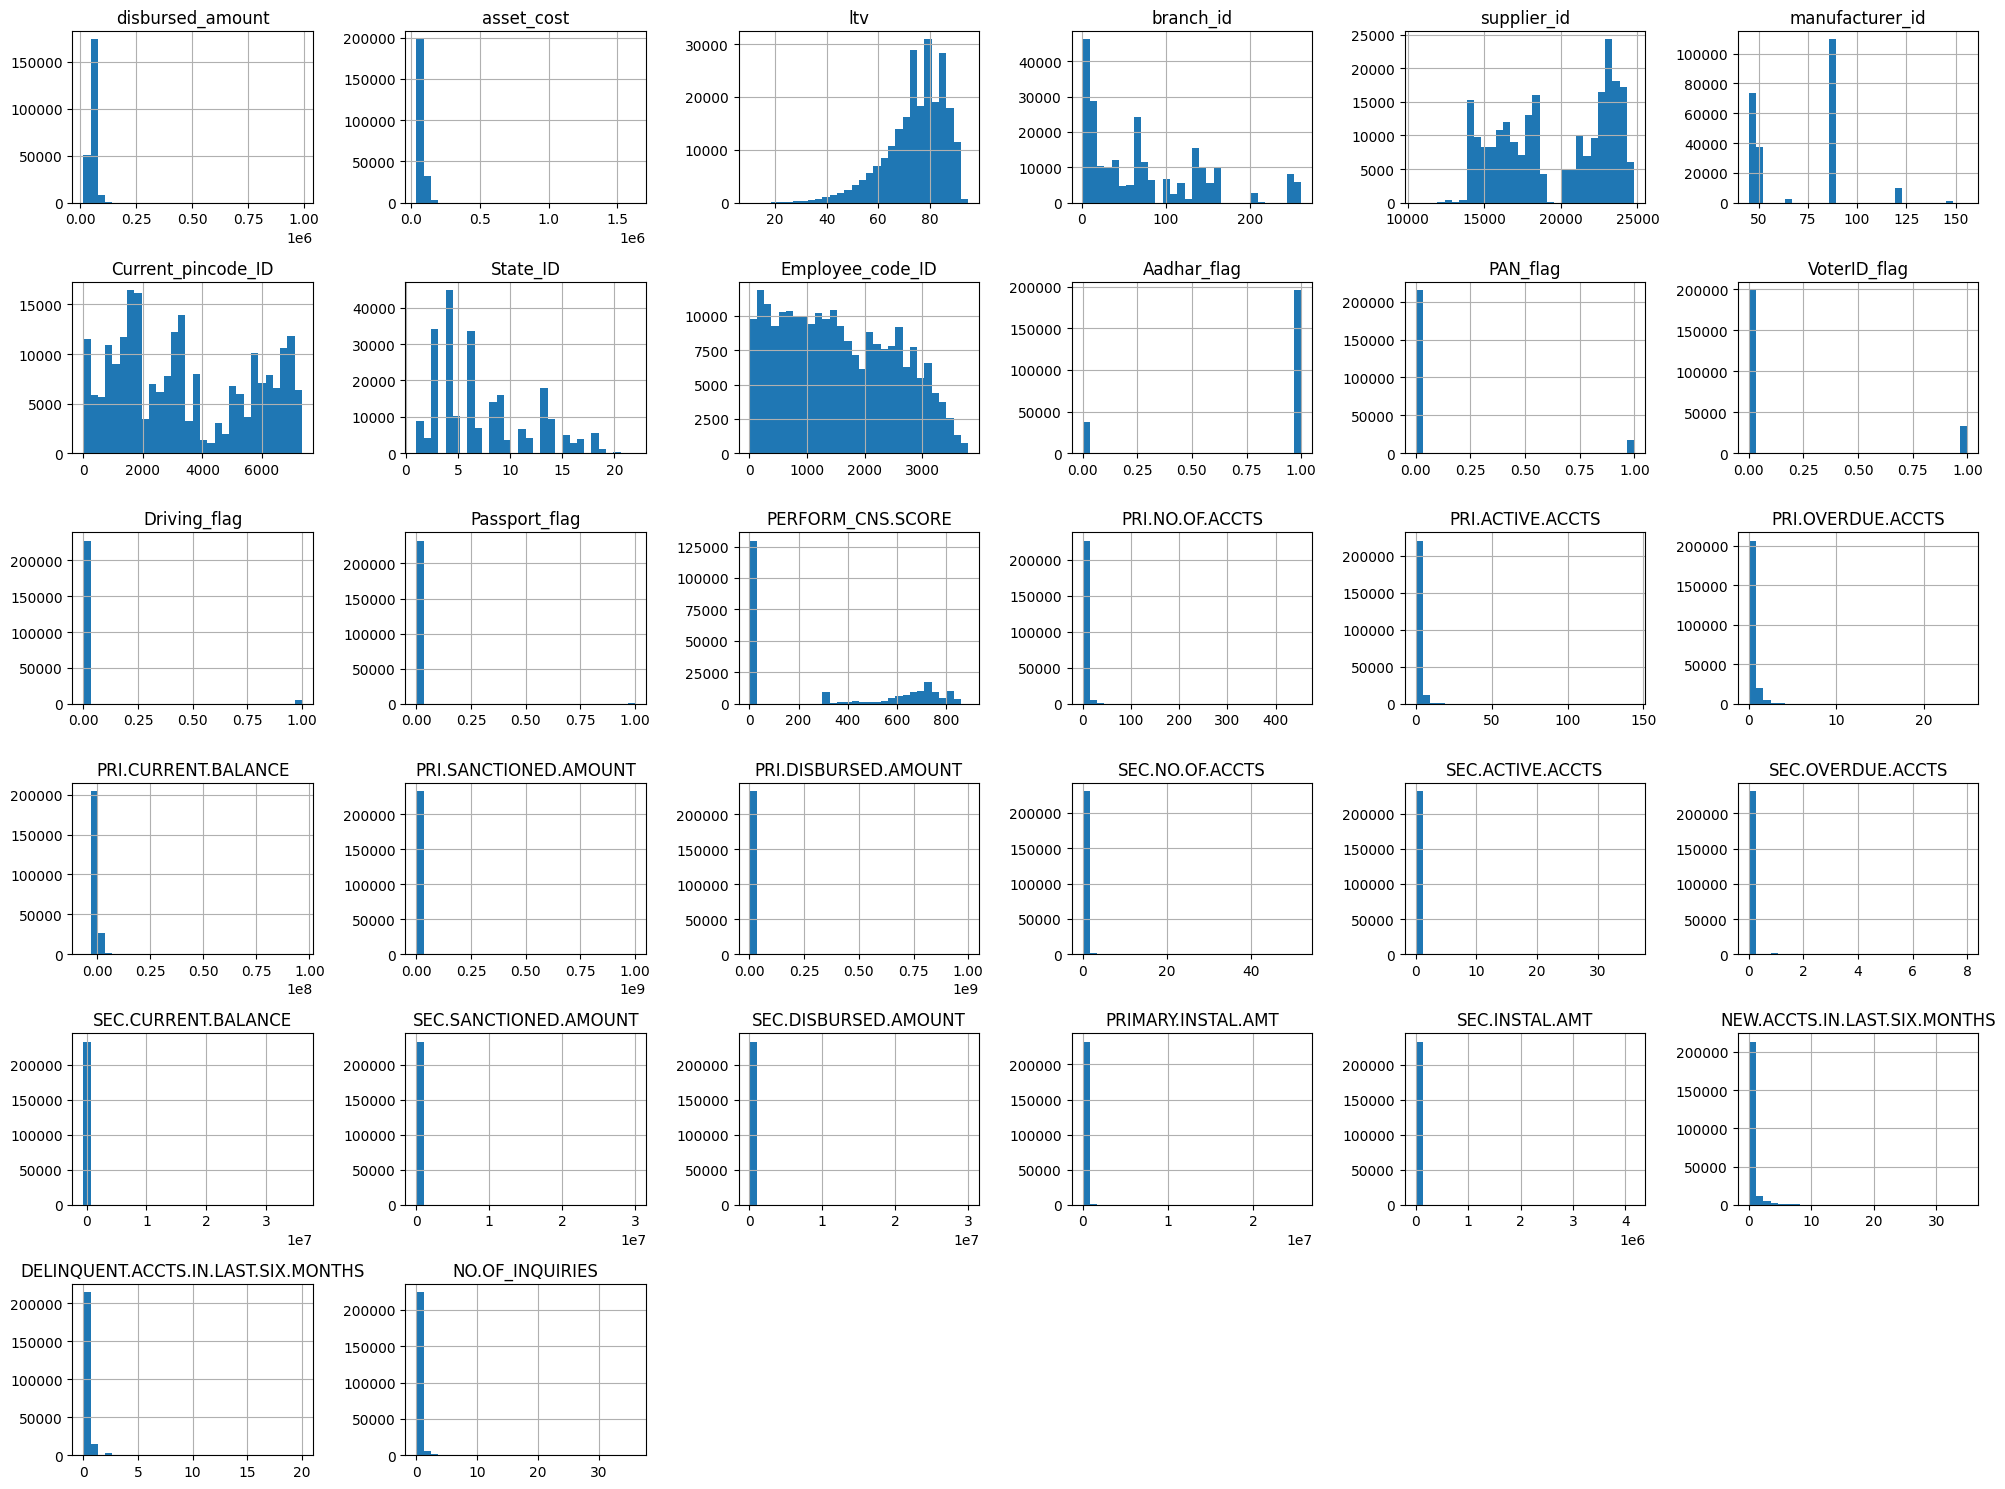

In [26]:
data[num_cols].hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()


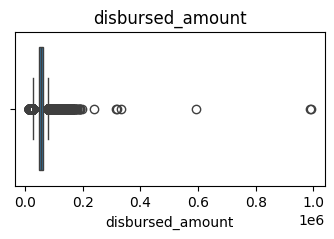

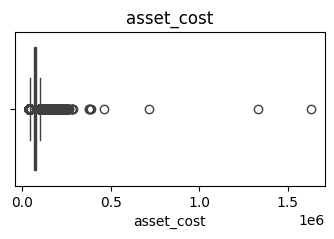

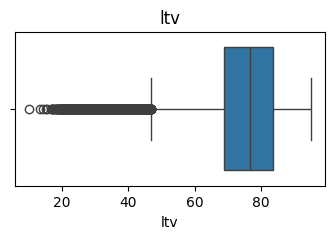

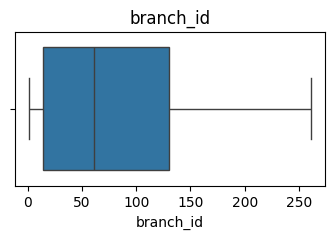

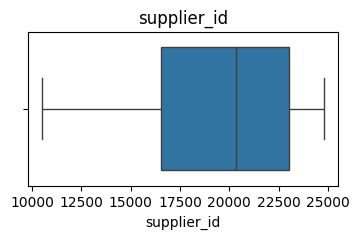

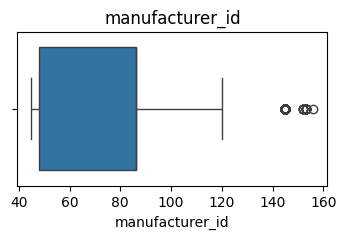

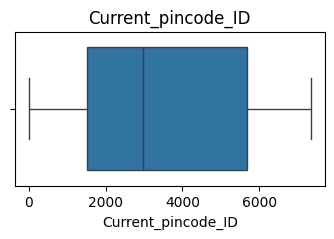

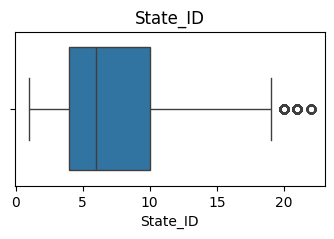

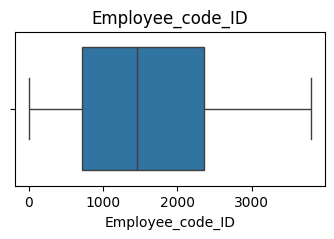

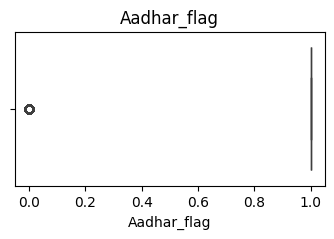

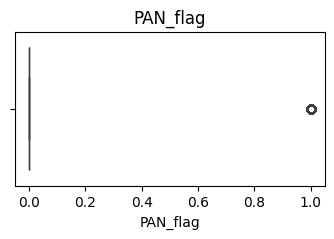

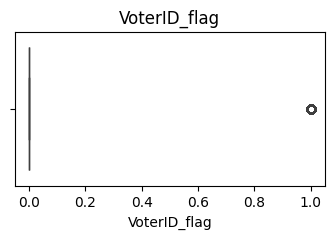

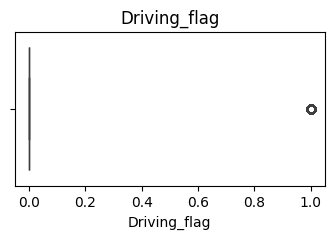

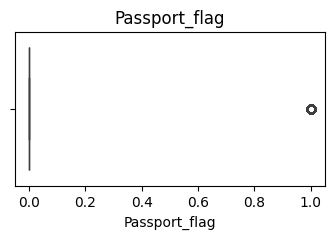

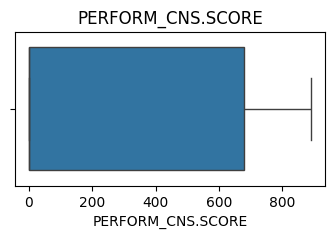

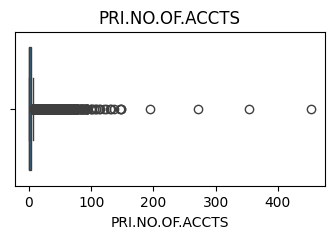

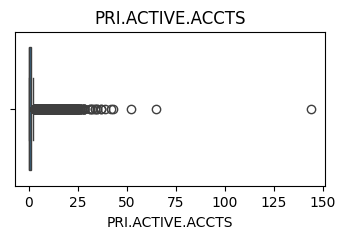

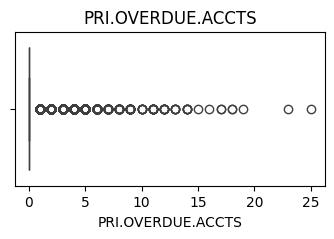

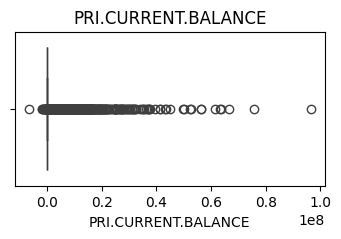

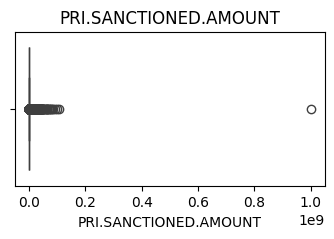

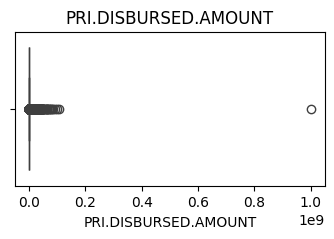

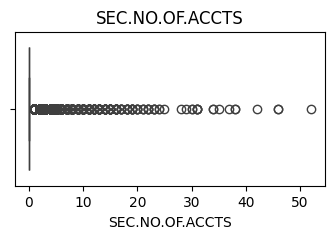

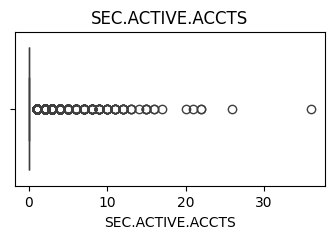

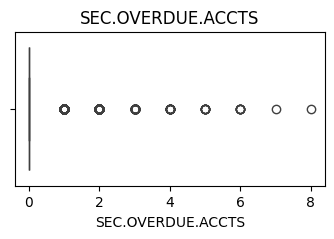

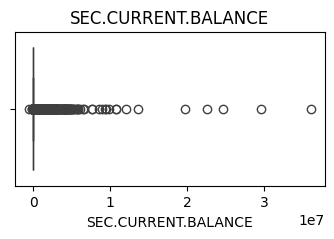

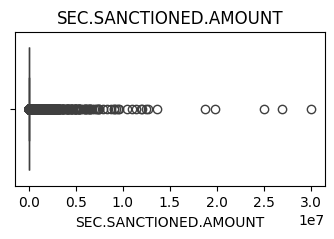

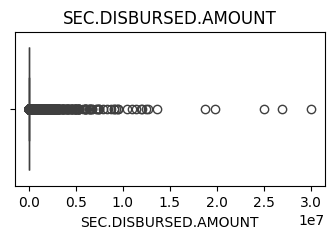

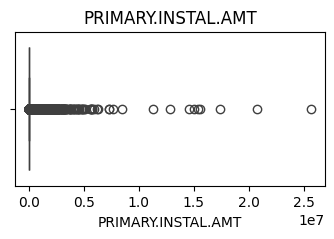

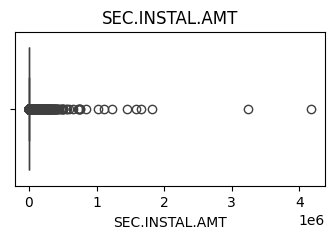

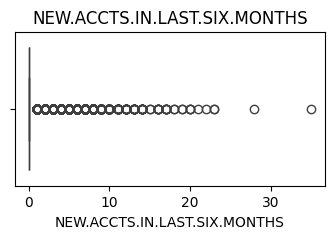

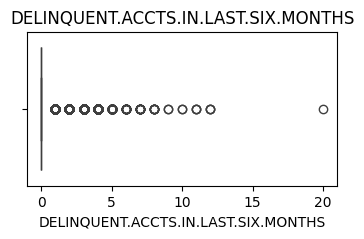

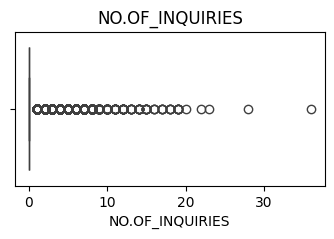

In [27]:
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()


### Univariate Analysis – Categorical Features

In [28]:
data['ltv'] = data['ltv'].clip(
    lower=data['ltv'].quantile(0.01),
    upper=data['ltv'].quantile(0.99)
)


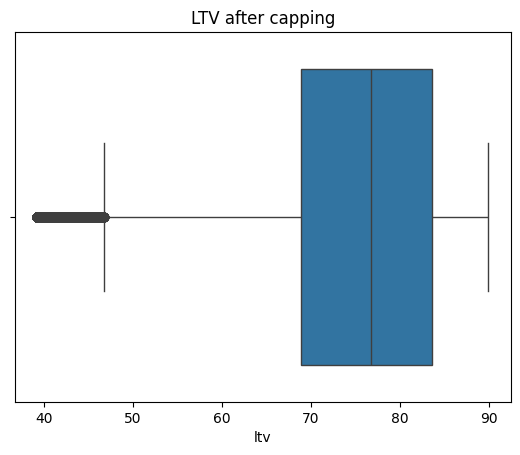

In [29]:
sns.boxplot(x=data['ltv'])
plt.title("LTV after capping")
plt.show()


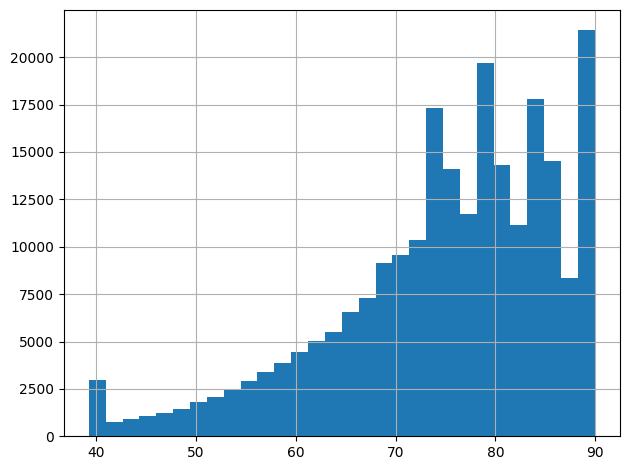

In [30]:
data['ltv'].hist(bins=30, )
plt.tight_layout()
plt.show()

In [31]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

In [32]:
for col in cat_cols:
    print(f"\n{col}")
    print(data[col].value_counts())



Date.of.Birth
Date.of.Birth
01-01-88    2173
01-01-90    2170
01-01-87    2127
01-01-86    2063
01-01-85    2005
            ... 
08-04-59       1
17-10-56       1
02-12-60       1
26-12-65       1
22-06-00       1
Name: count, Length: 15433, dtype: int64

Employment.Type
Employment.Type
Self employed    127635
Salaried          97858
Unknown            7661
Name: count, dtype: int64

DisbursalDate
DisbursalDate
31-10-18    8826
24-10-18    6701
31-08-18    6690
23-10-18    6440
26-10-18    6215
            ... 
26-08-18     705
12-08-18     572
13-09-18     330
05-08-18      42
02-10-18      25
Name: count, Length: 84, dtype: int64

PERFORM_CNS.SCORE.DESCRIPTION
PERFORM_CNS.SCORE.DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                  

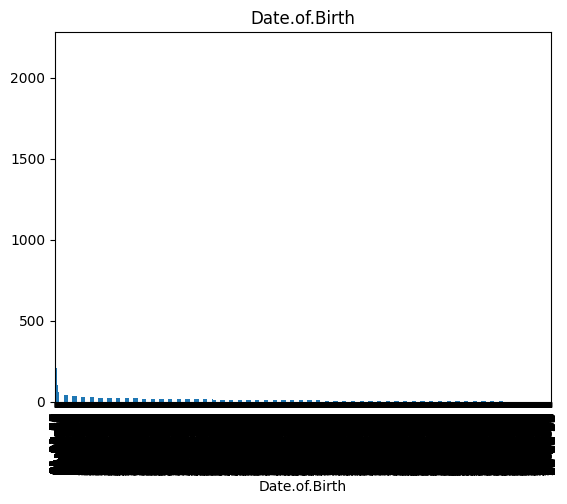

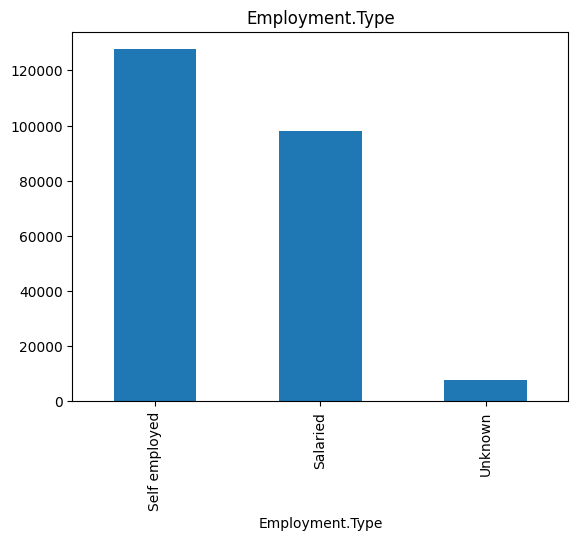

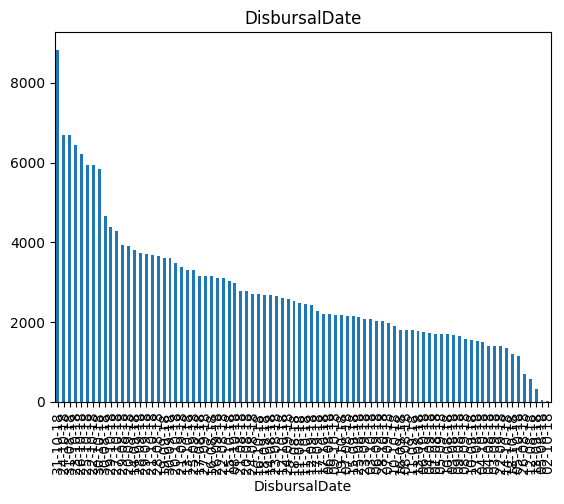

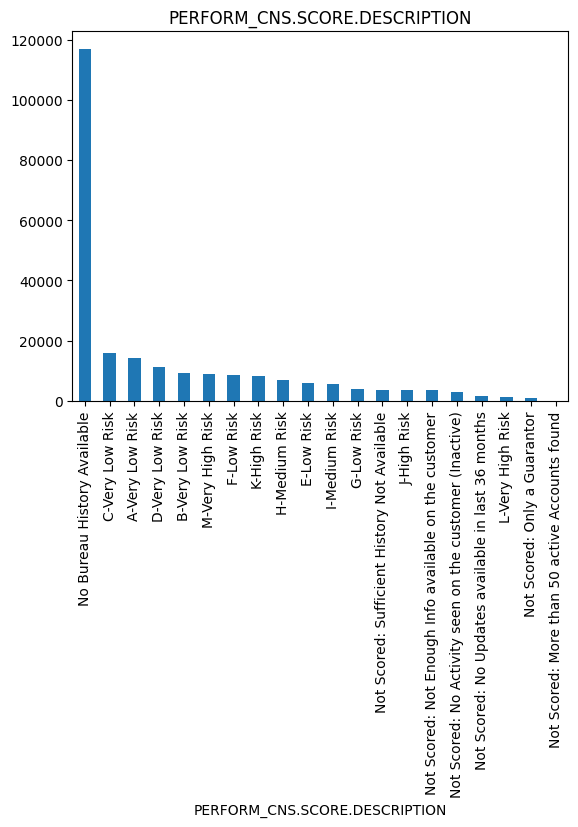

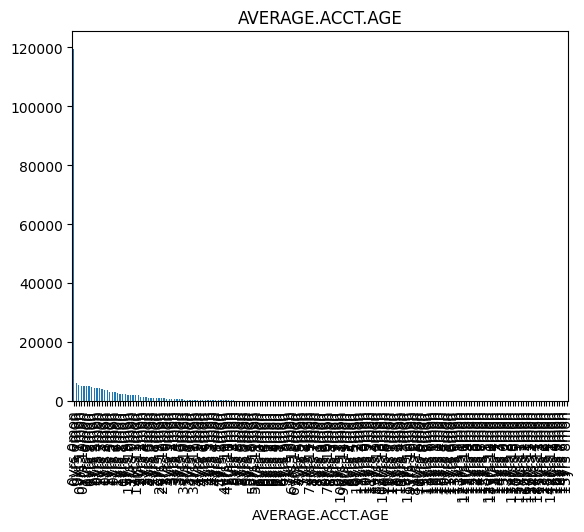

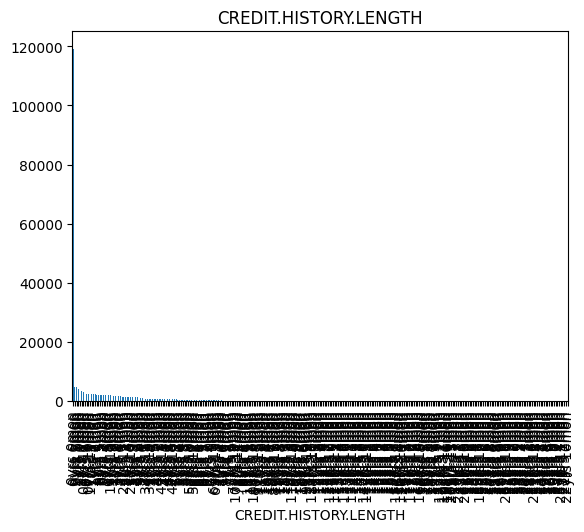

In [33]:
for col in cat_cols:
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


In [34]:
# Convert DOB to datetime
data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], format='%d-%m-%y', errors='coerce')

# Calculate age in years
data['Age'] = ((pd.to_datetime('today') - data['Date.of.Birth']).dt.days / 365.25).astype(int)

# Drop original column
data.drop(columns=['Date.of.Birth'], inplace=True)


In [35]:
# Convert DisbursalDate to datetime
data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], format='%d-%m-%y', errors='coerce')

# Extract year and month
data['Disbursal_Year'] = data['DisbursalDate'].dt.year
data['Disbursal_Month'] = data['DisbursalDate'].dt.month

# Drop original column
data.drop(columns=['DisbursalDate'], inplace=True)


In [36]:
# Convert 'Xyrs Ymon' to total months
def convert_to_months(val):
    if pd.isna(val):
        return np.nan
    yrs, mon = val.split()
    return int(yrs.replace('yrs', '')) * 12 + int(mon.replace('mon', ''))

data['AVERAGE.ACCT.AGE_MONTHS'] = data['AVERAGE.ACCT.AGE'].apply(convert_to_months)

# Drop original column
data.drop(columns=['AVERAGE.ACCT.AGE'], inplace=True)


In [37]:
data['CREDIT.HISTORY_LENGTH_MONTHS'] = data['CREDIT.HISTORY.LENGTH'].apply(convert_to_months)

# Drop original column
data.drop(columns=['CREDIT.HISTORY.LENGTH'], inplace=True)


In [38]:
data[['Age', 'Disbursal_Year', 'Disbursal_Month',
      'AVERAGE.ACCT.AGE_MONTHS', 'CREDIT.HISTORY_LENGTH_MONTHS']].head()


,Age,Disbursal_Year,Disbursal_Month,AVERAGE.ACCT.AGE_MONTHS,CREDIT.HISTORY_LENGTH_MONTHS
0,41,2018,8,0,0
1,40,2018,9,23,23
2,40,2018,8,0,0
3,31,2018,10,8,15
4,48,2018,9,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_ID                   233154 non-null  int64  
 7   Employment.Type                      233154 non-null  object 
 8   State_ID                             233154 non-null  int64  
 9   Employee_code_ID                     233154 non-null  int64  
 10  Aadhar_flag                          233154 non-null  int64  
 11  PAN_flag     

In [40]:
new_cols = [
    'Age',
    'Disbursal_Year',
    'Disbursal_Month',
    'AVERAGE.ACCT.AGE_MONTHS',
    'CREDIT.HISTORY_LENGTH_MONTHS'
]

data[new_cols].nunique()


Age                              49
Disbursal_Year                    1
Disbursal_Month                   3
AVERAGE.ACCT.AGE_MONTHS         192
CREDIT.HISTORY_LENGTH_MONTHS    294
dtype: int64

In [41]:
# Drop Disbursal_Year (no variance)
data.drop(columns=['Disbursal_Year'], inplace=True)


# BIVARIATE ANALYSIS

In [42]:
# BIVARIATE ANALYSIS
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_default')
num_cols


Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'Age',
       'AVERAGE.ACCT.AGE_MONTHS', 'CREDIT.HISTORY_LENGTH_MONTHS'],
      dtype='object')

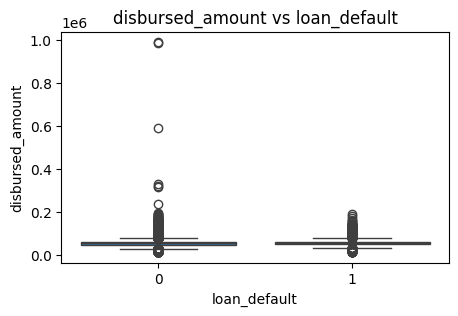

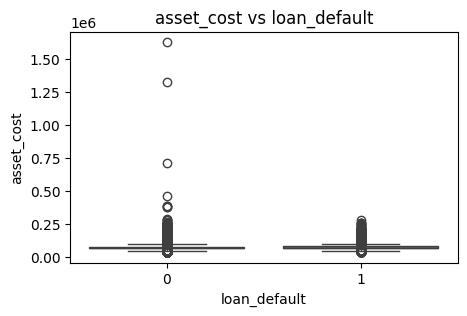

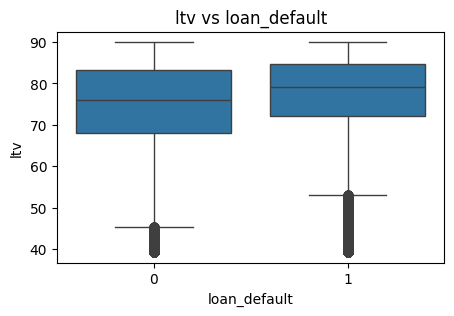

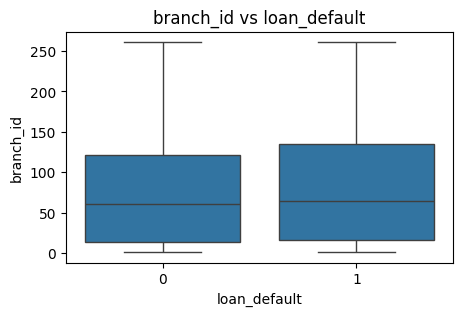

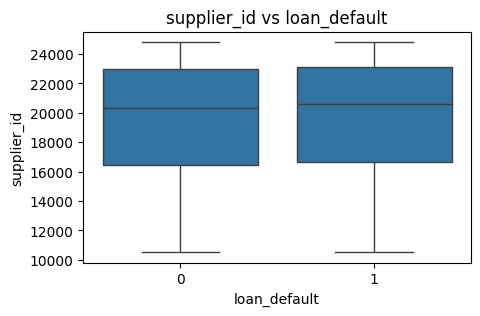

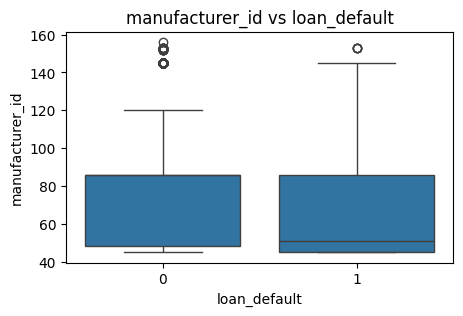

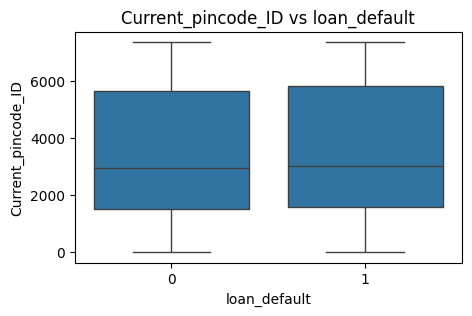

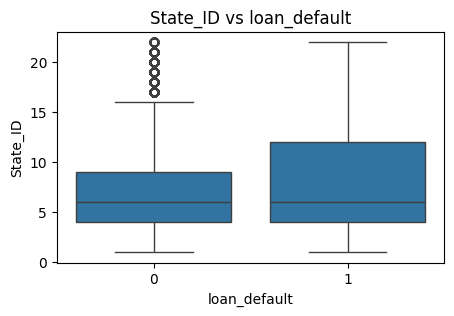

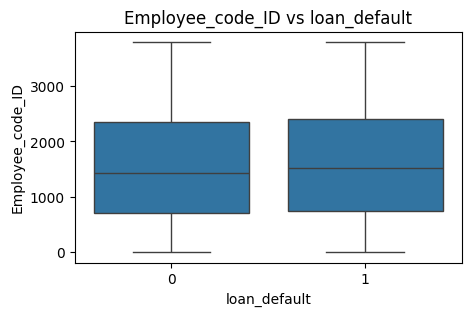

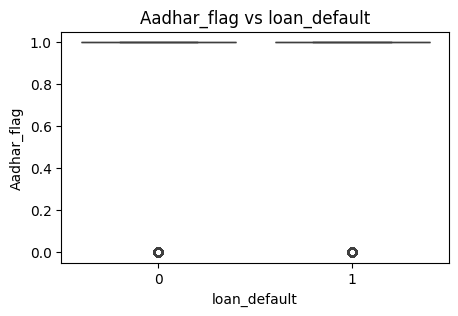

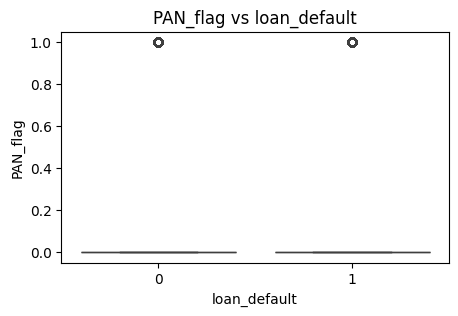

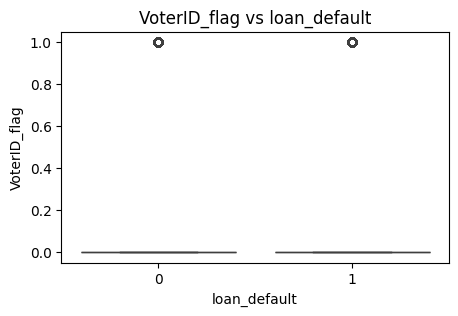

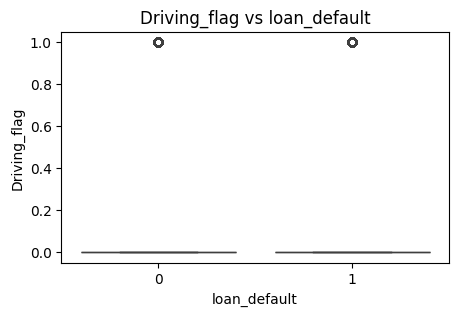

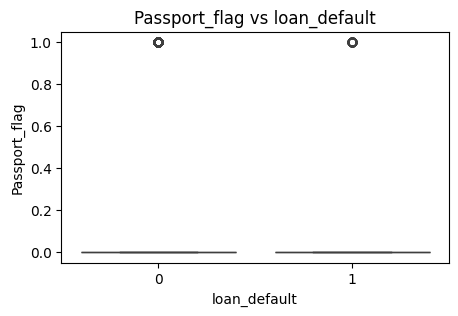

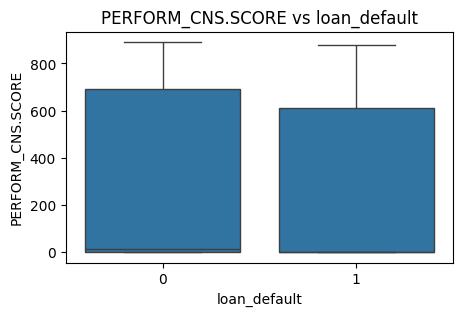

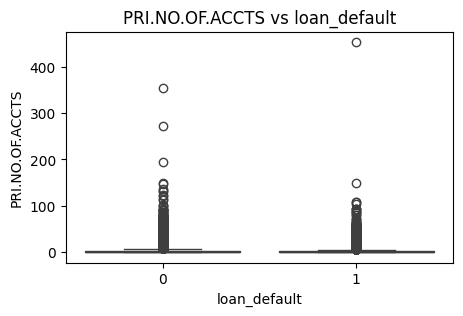

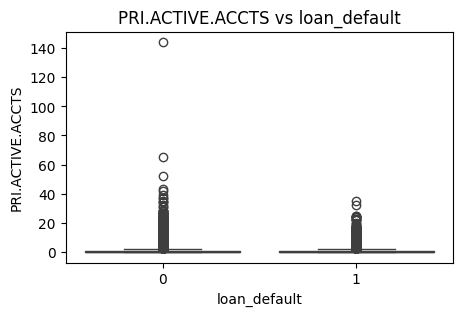

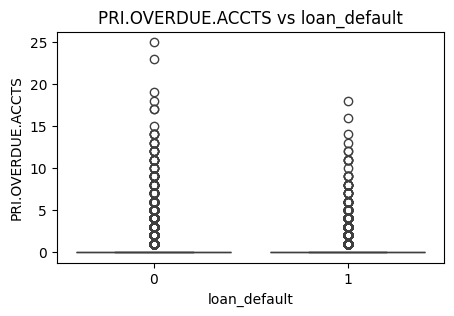

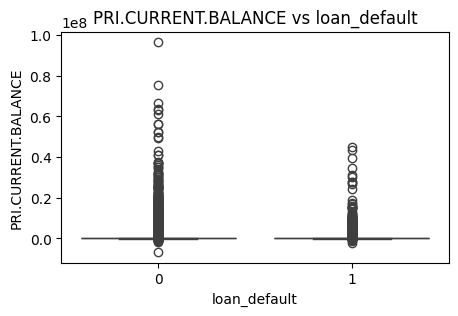

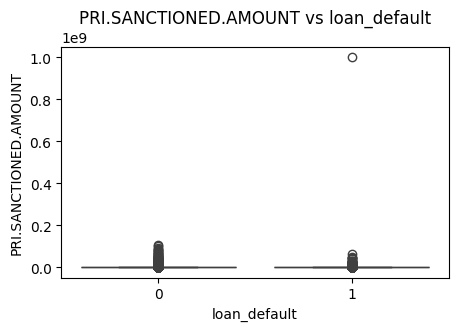

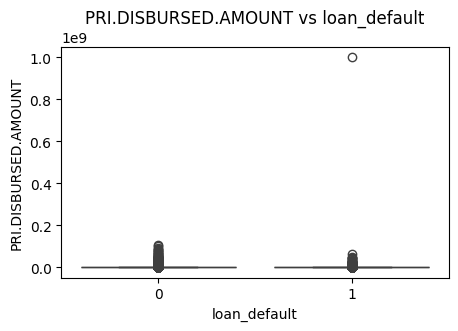

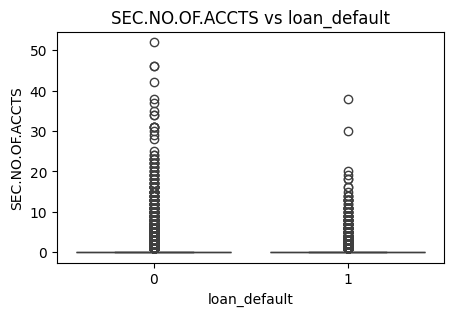

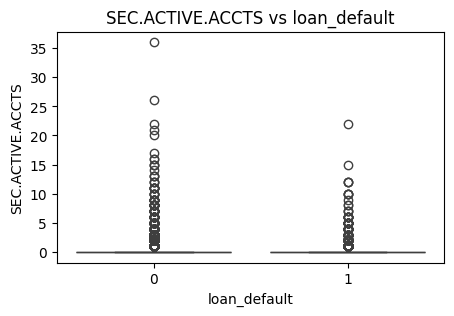

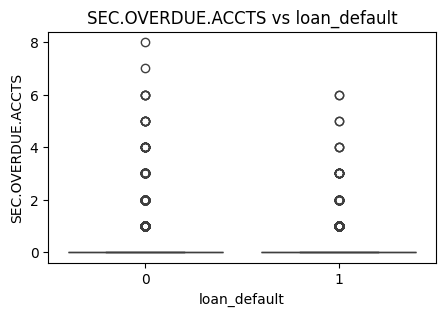

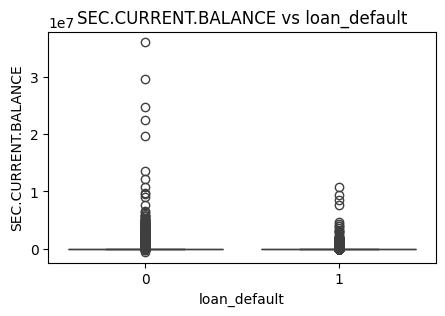

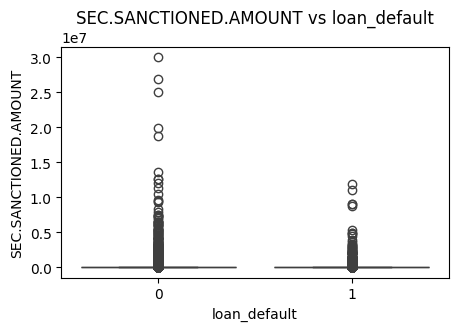

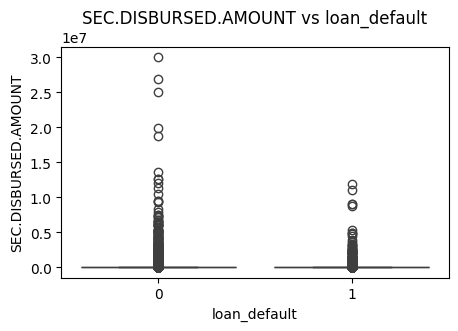

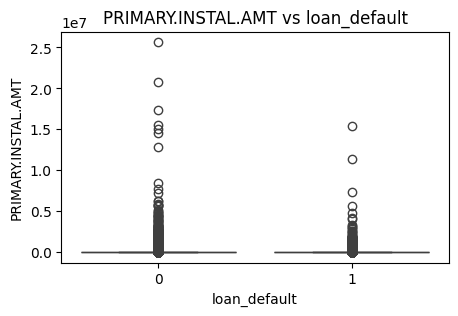

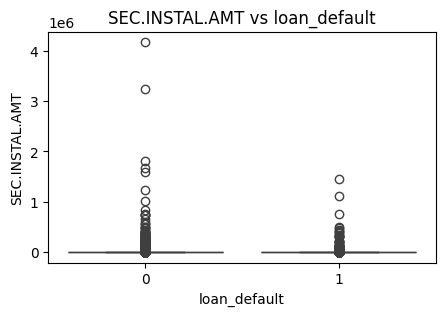

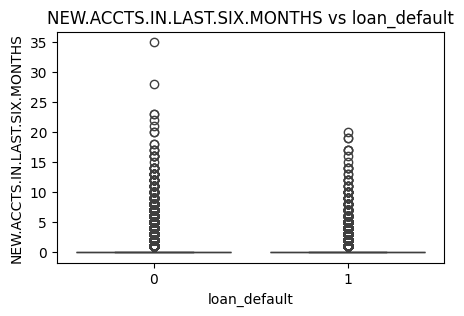

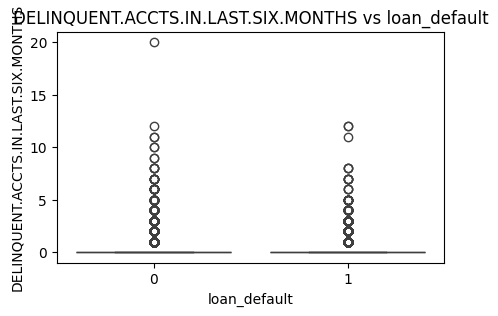

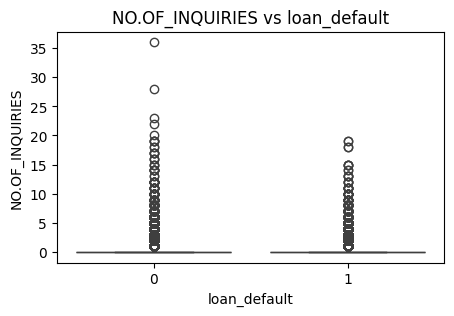

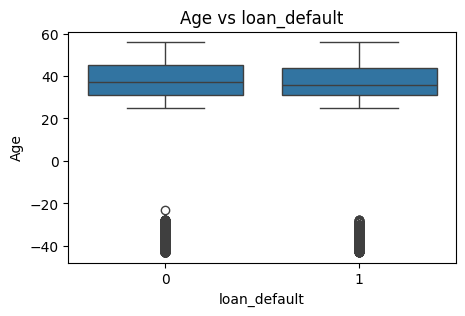

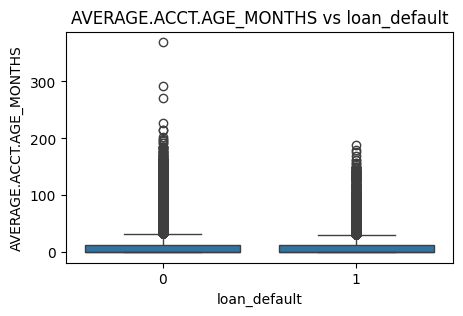

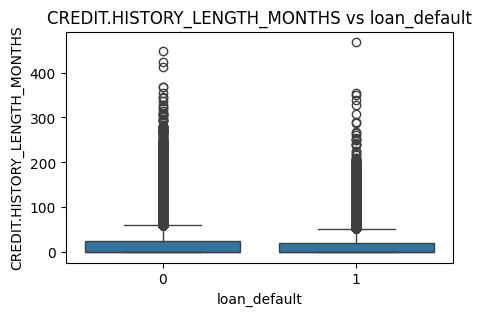

In [43]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='loan_default', y=col, data=data)
    plt.title(f'{col} vs loan_default')
    plt.show()


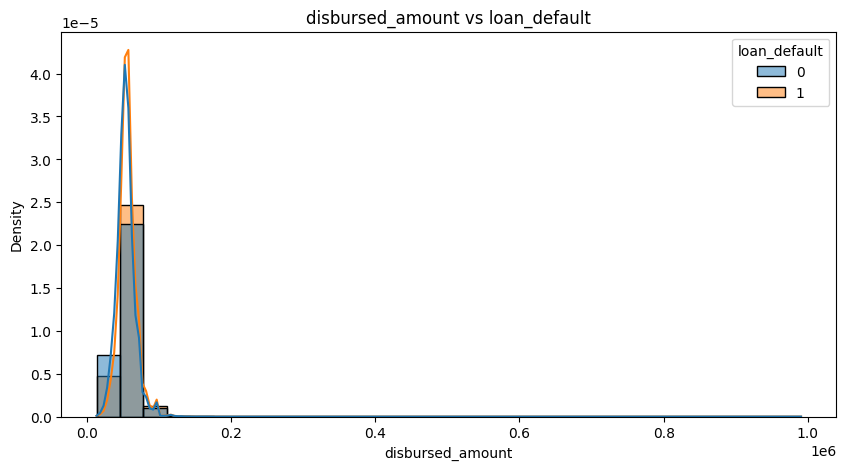

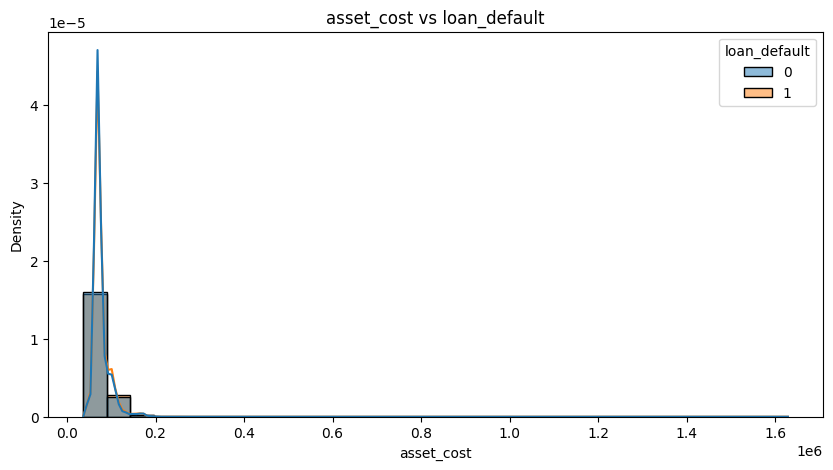

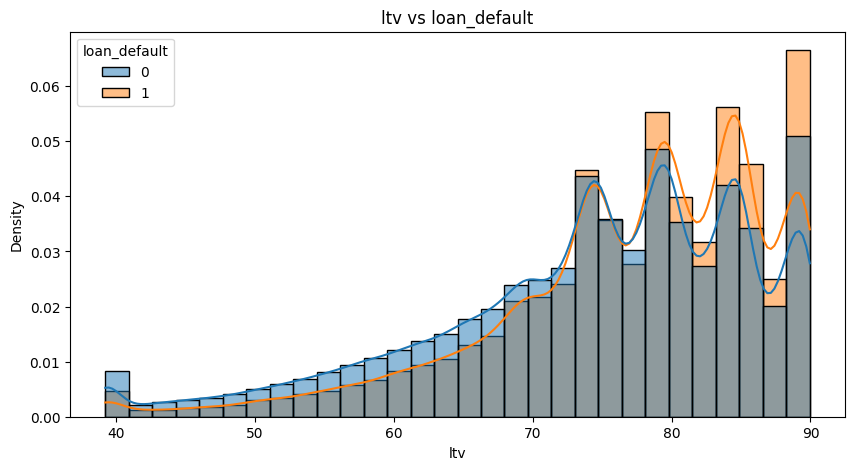

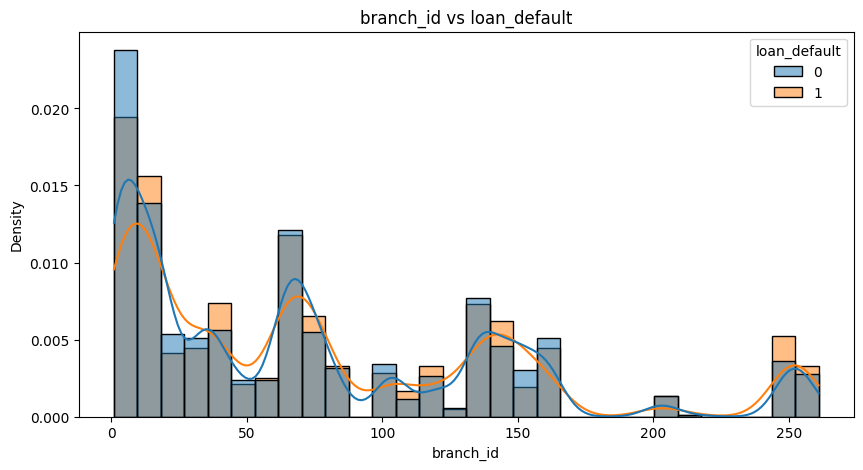

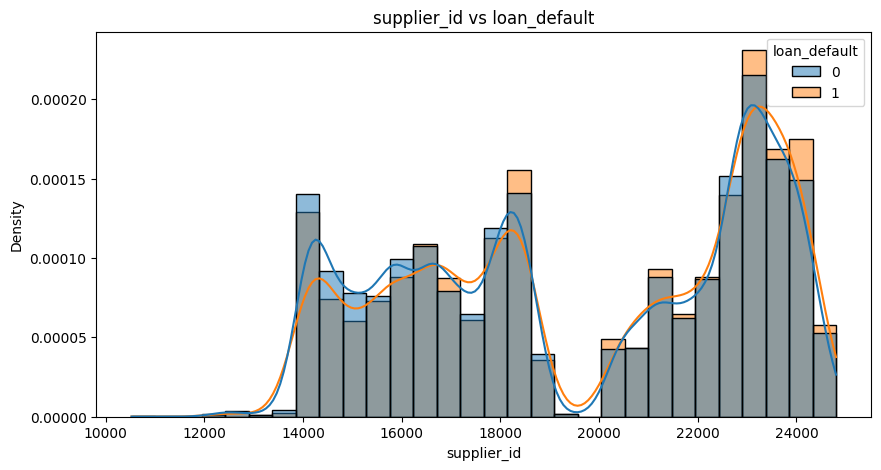

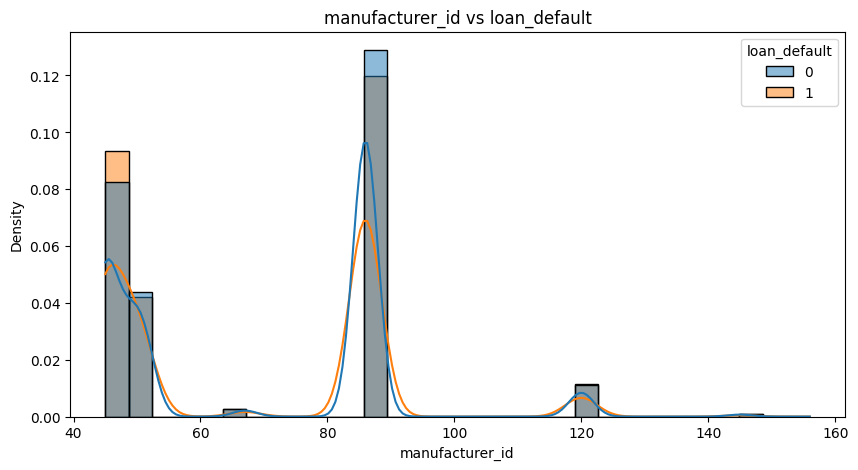

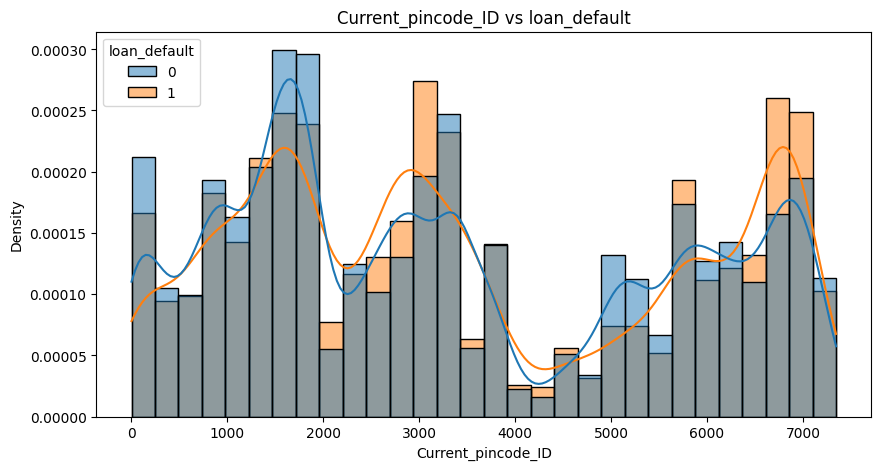

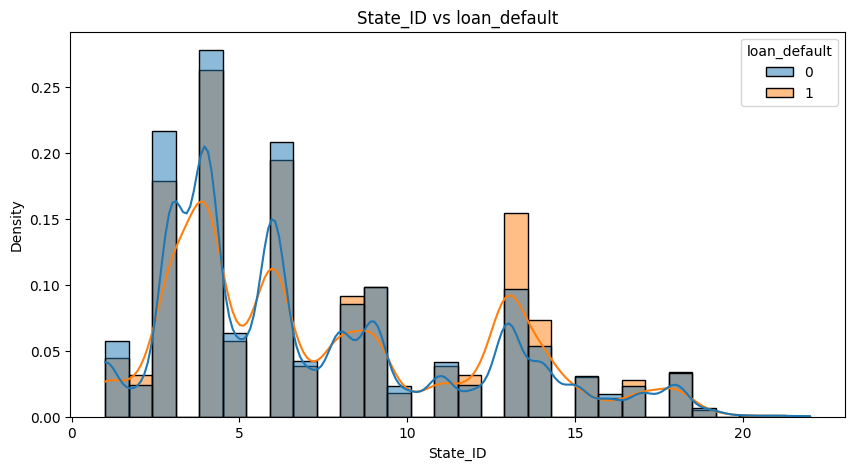

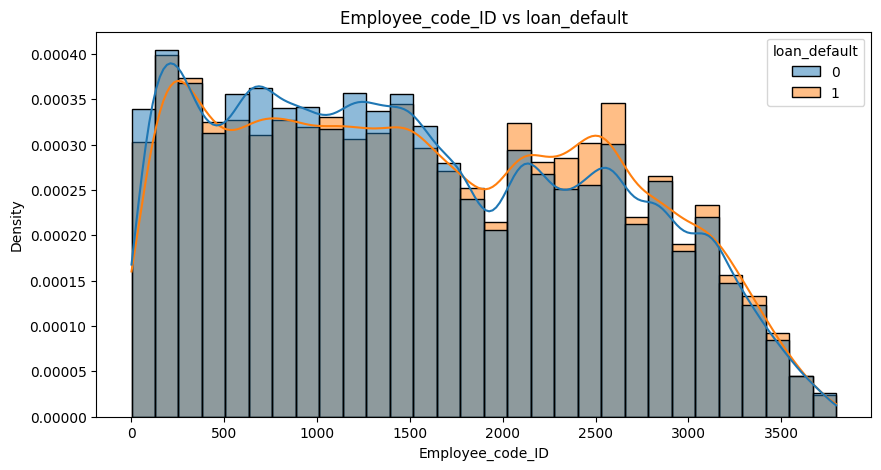

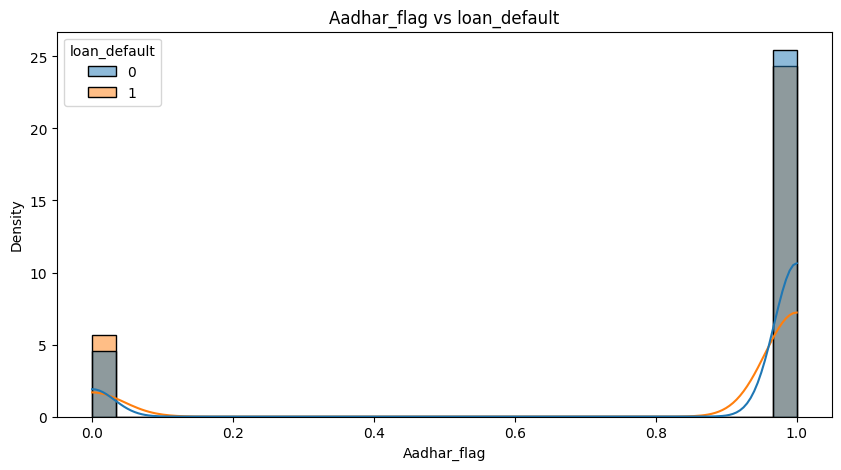

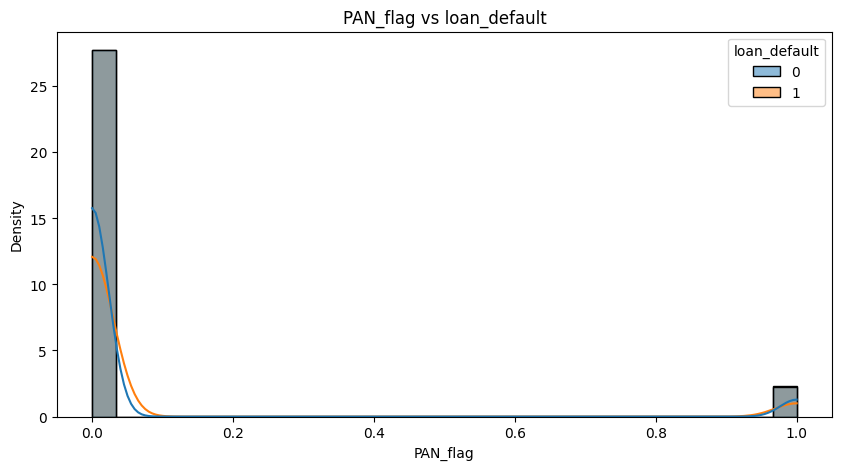

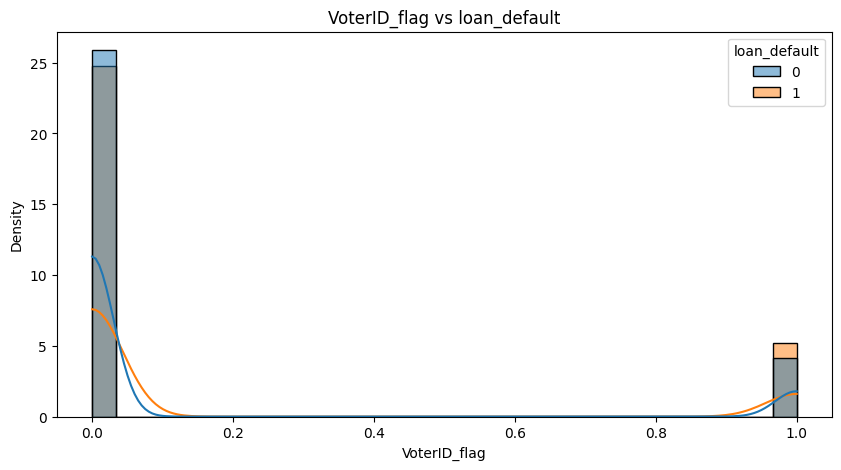

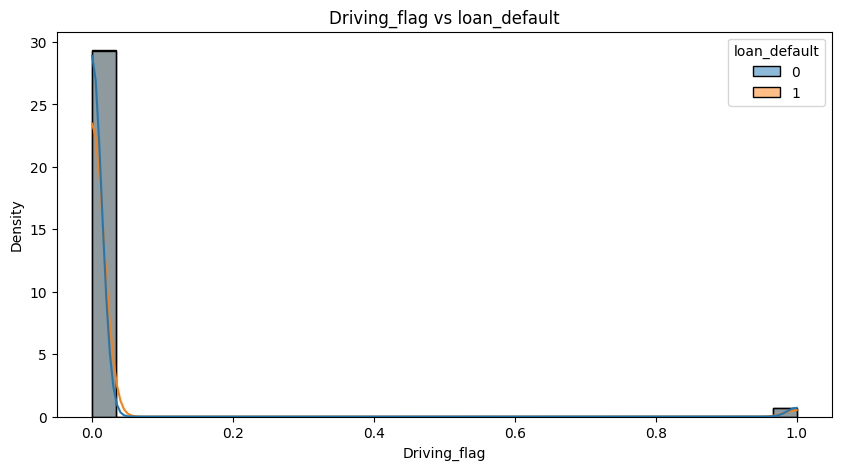

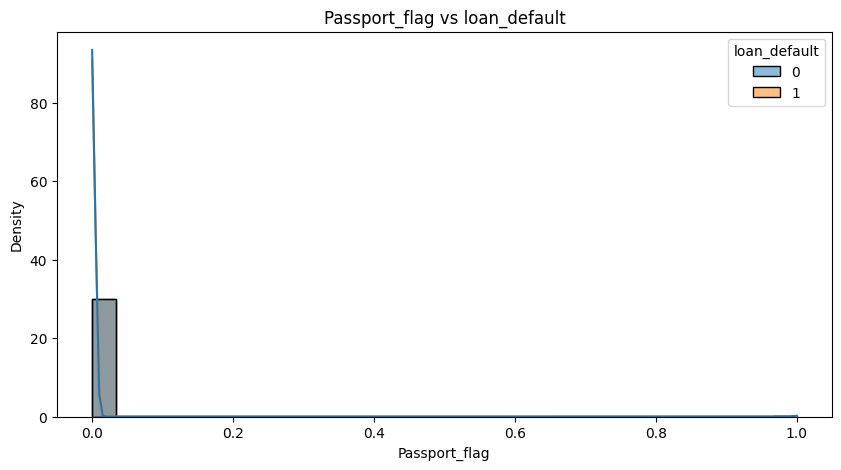

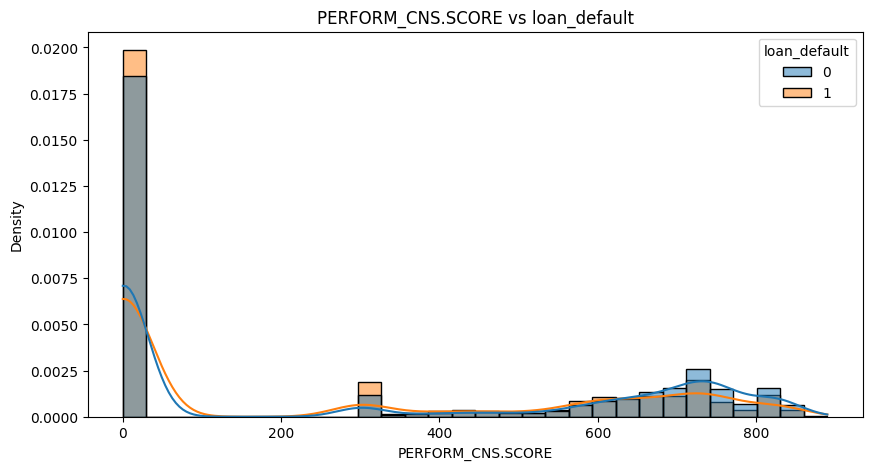

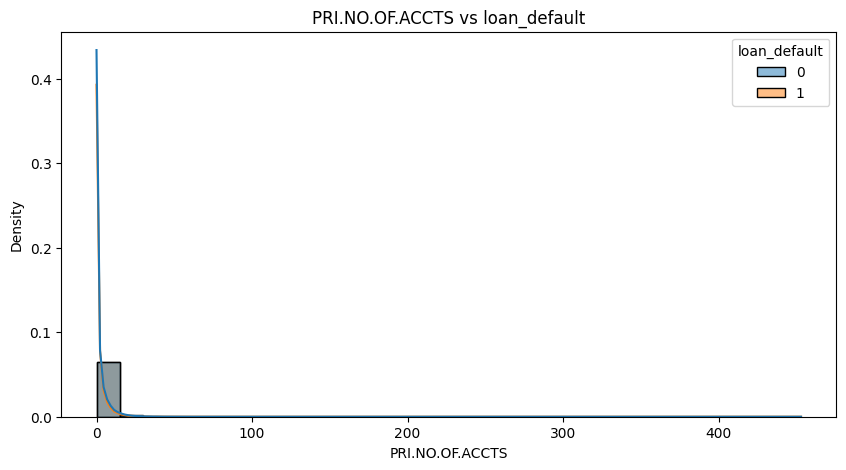

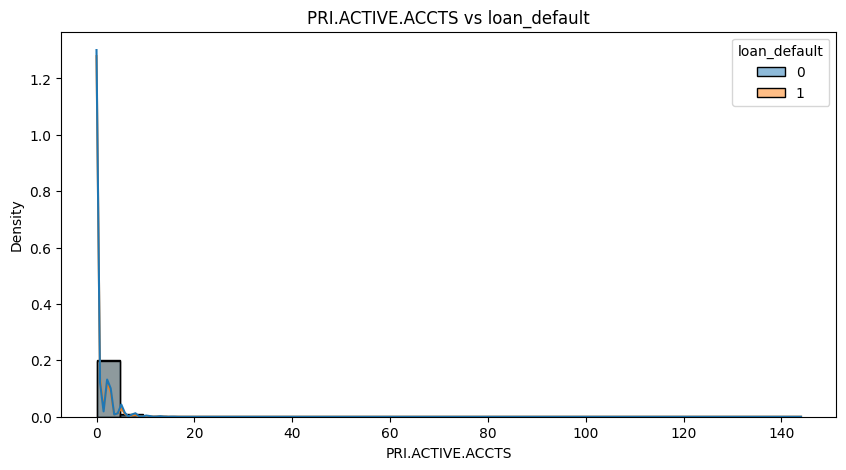

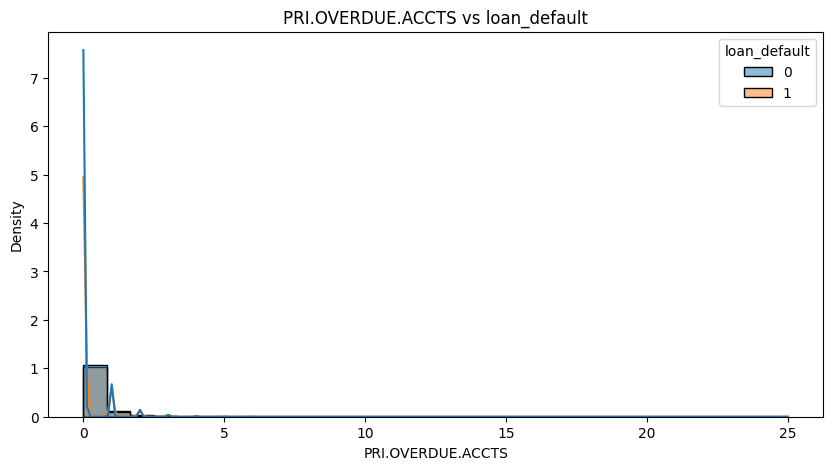

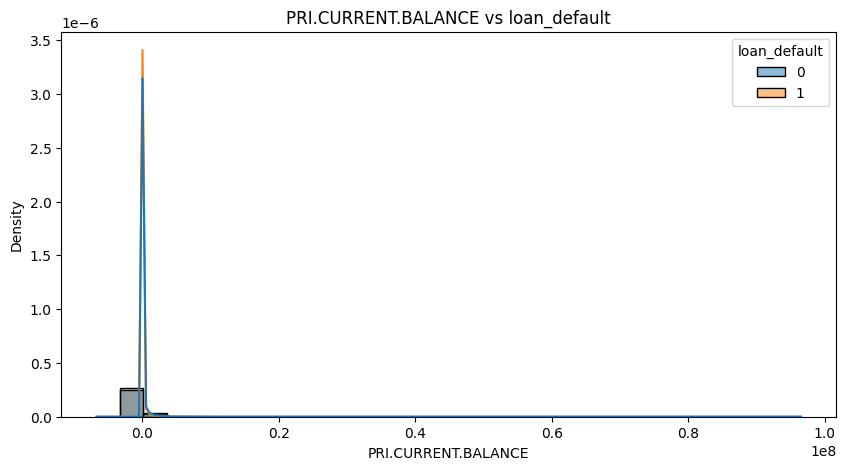

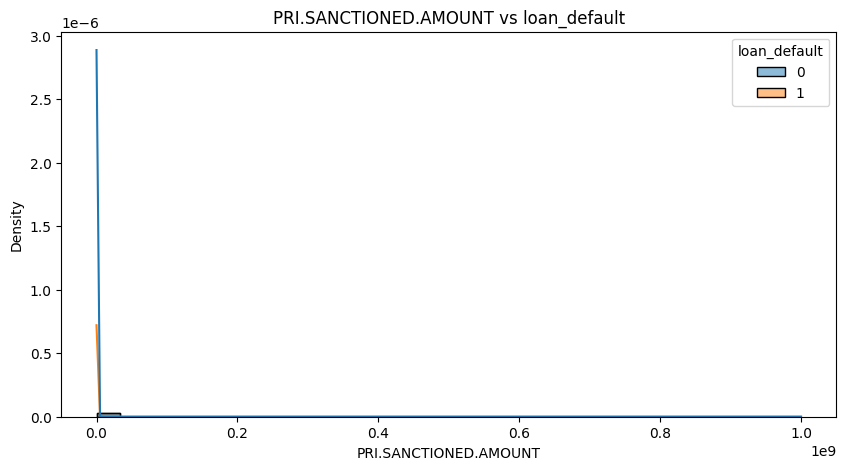

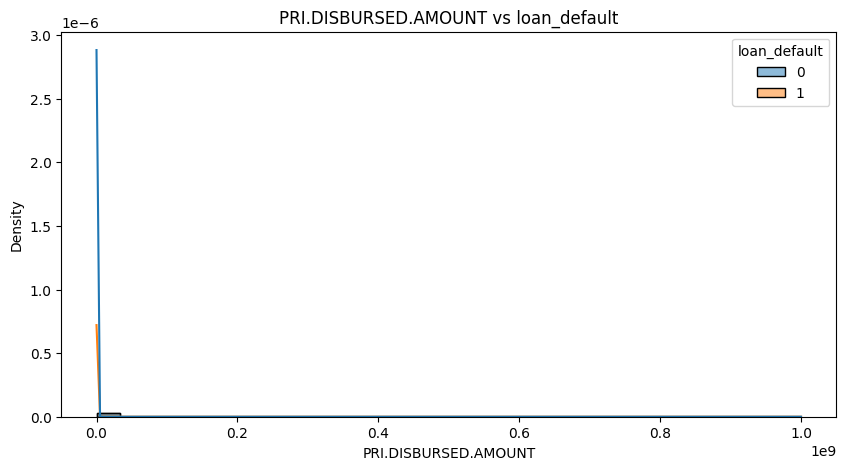

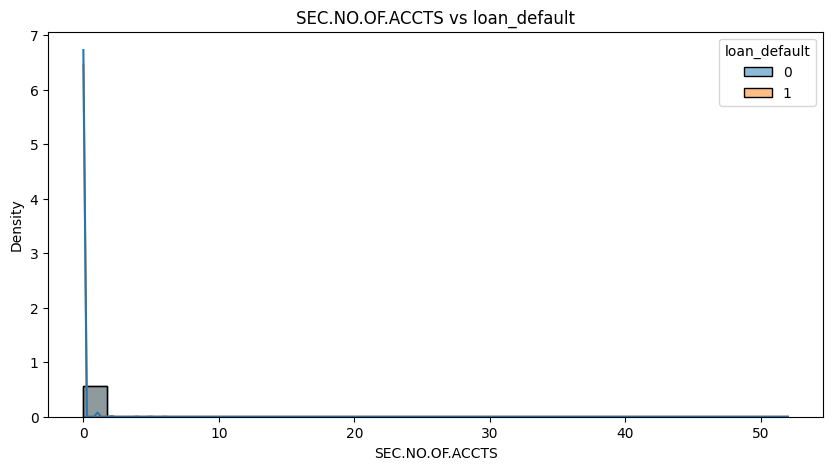

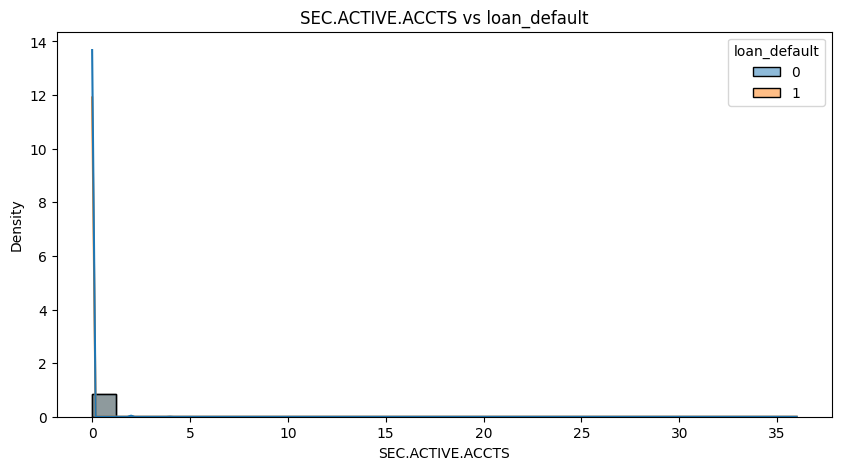

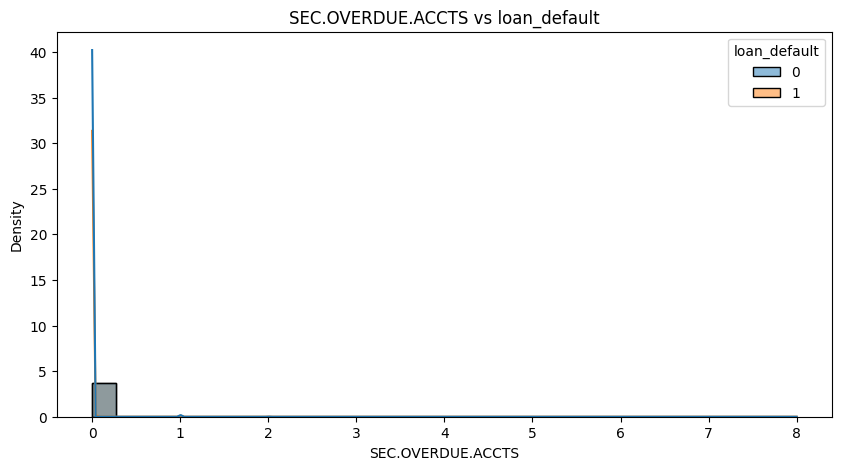

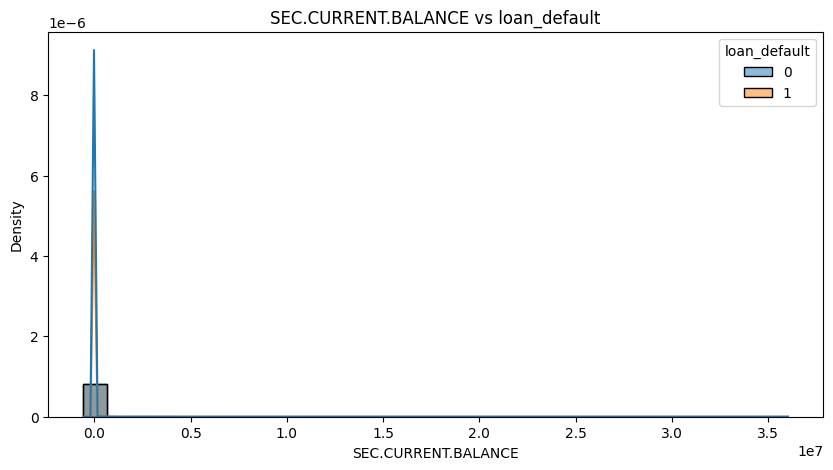

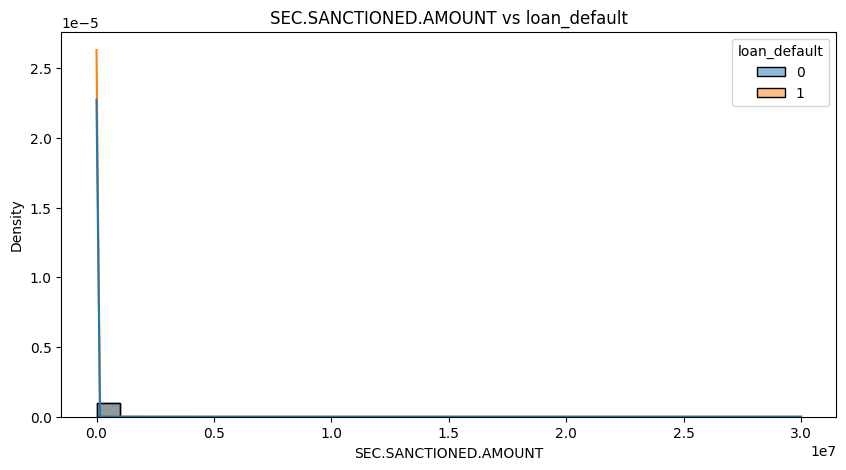

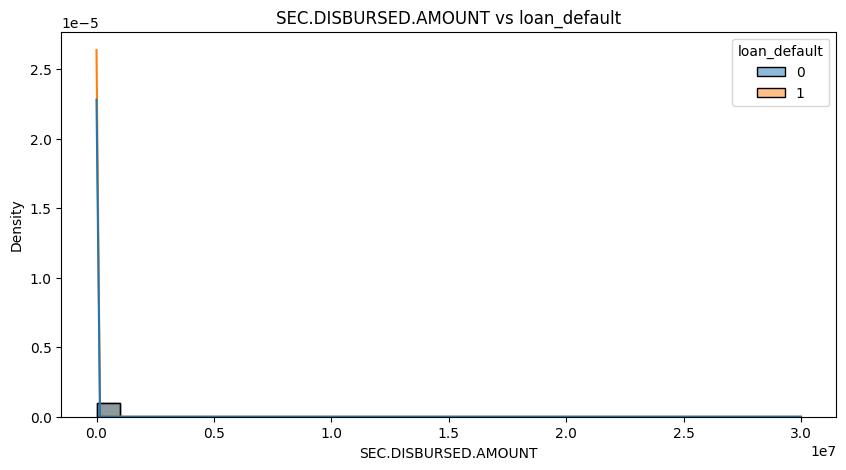

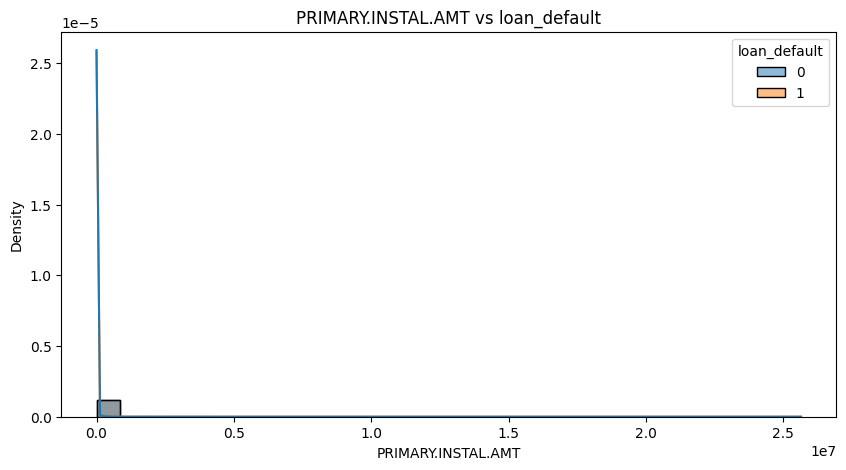

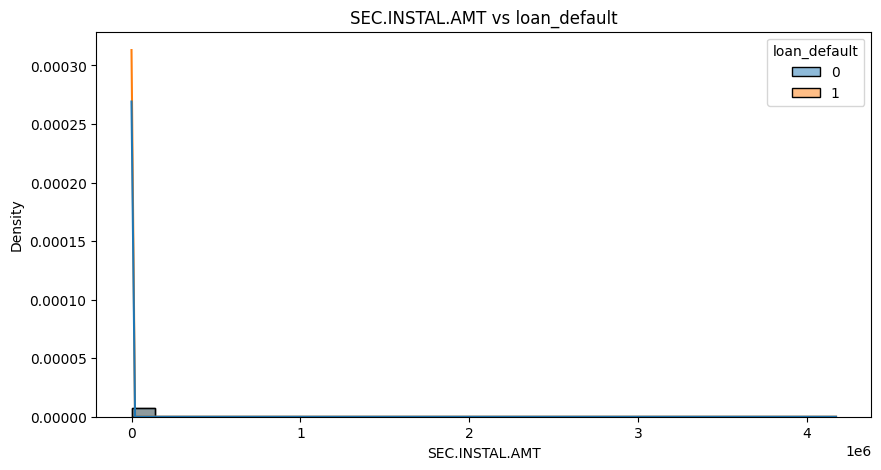

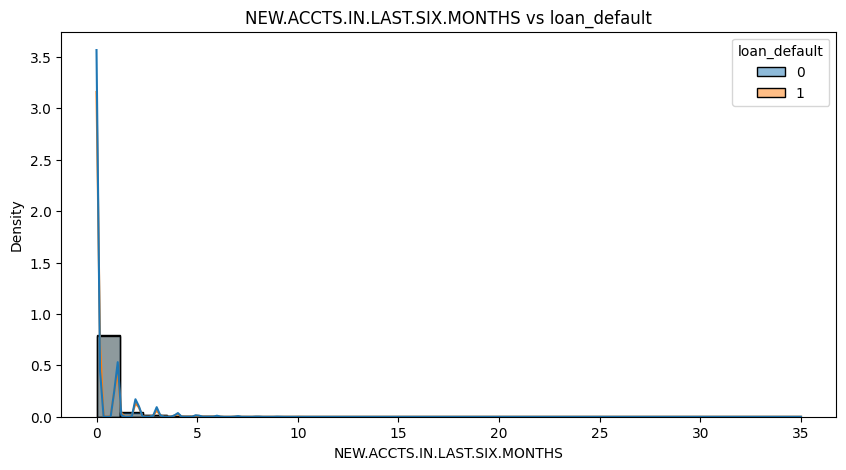

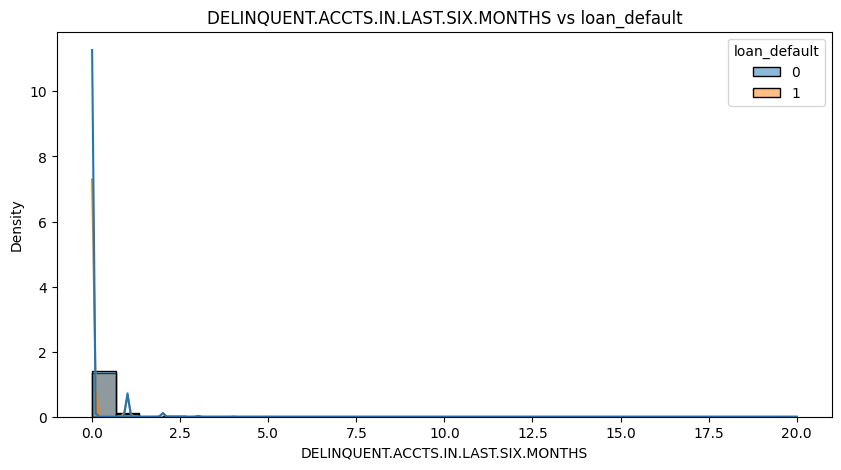

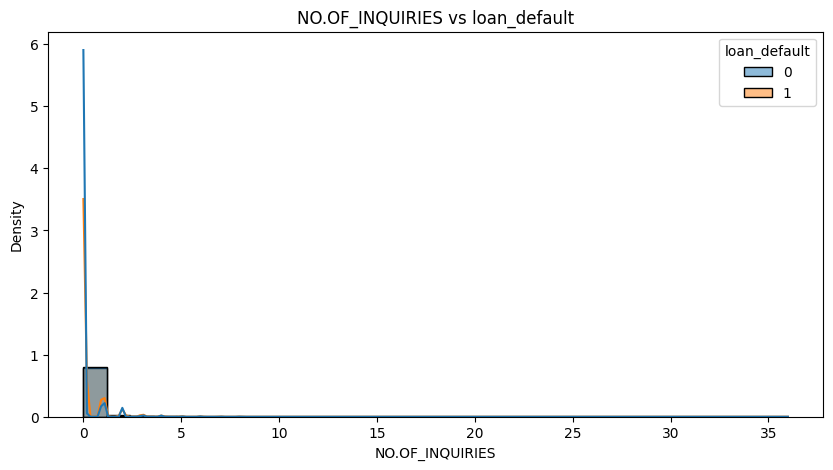

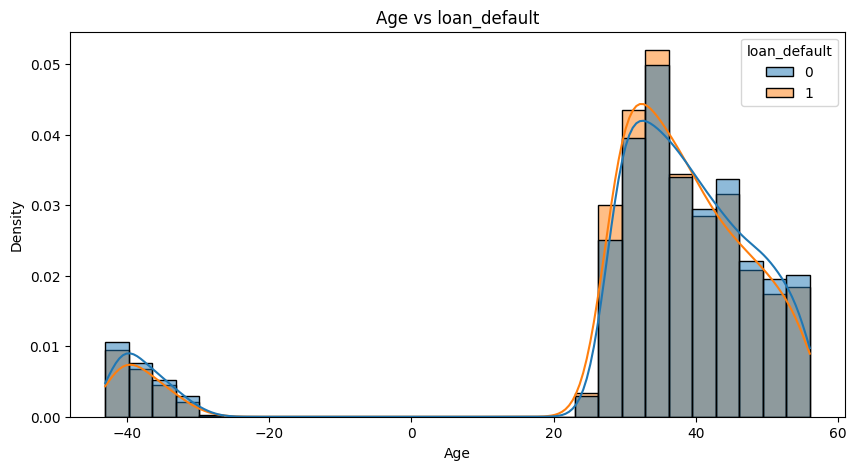

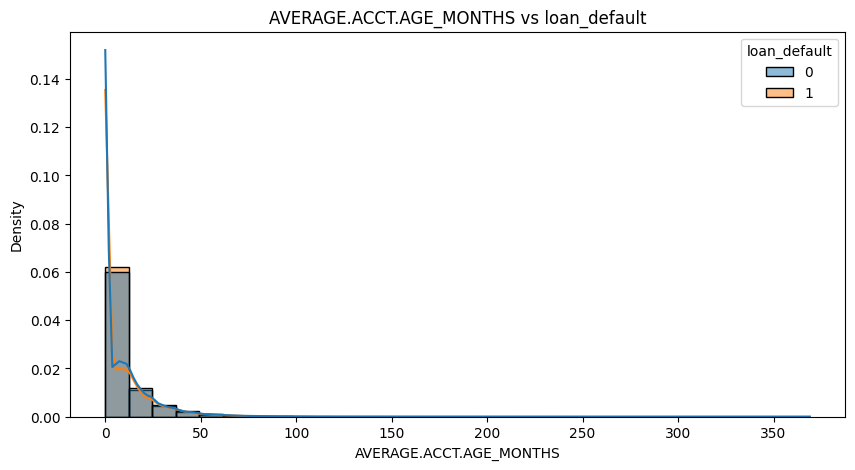

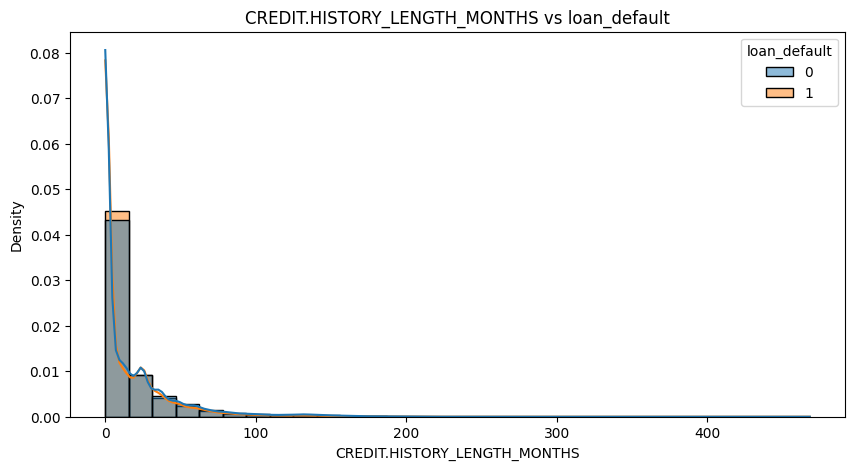

In [44]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(
        data=data,
        x=col,
        hue='loan_default',
        bins=30,
        kde=True,
        stat='density',
        common_norm=False
    )
    plt.title(f'{col} vs loan_default')
    plt.show()


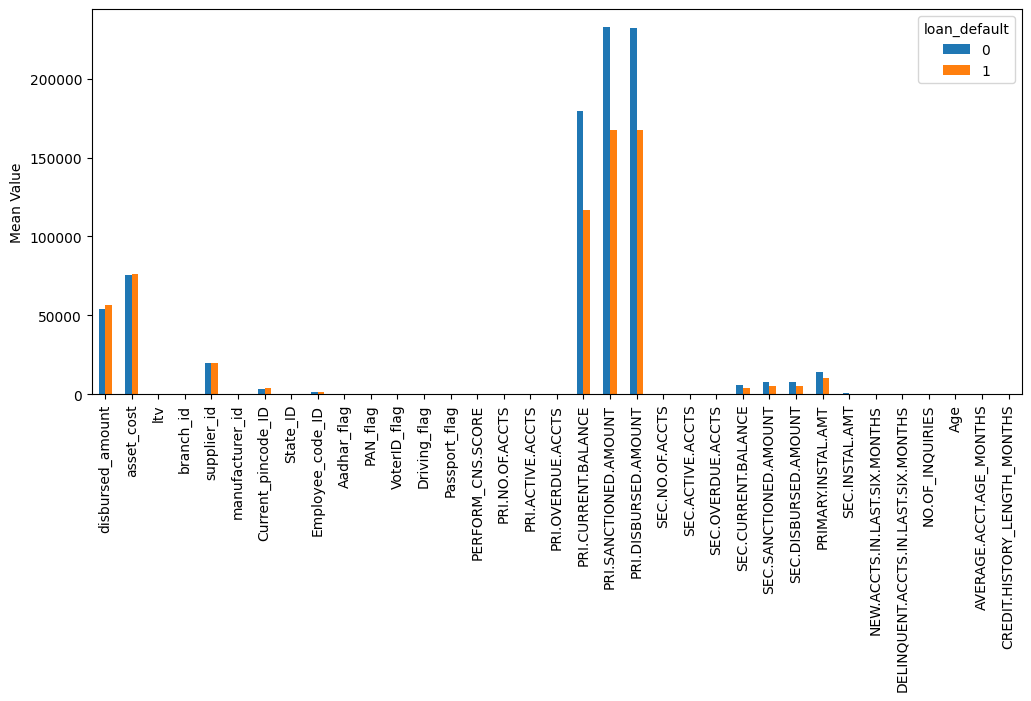

In [45]:
data.groupby('loan_default')[num_cols].mean().T.plot(
    kind='bar', figsize=(12,5)
)
plt.ylabel('Mean Value')
plt.show()


In [46]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION'], dtype='object')

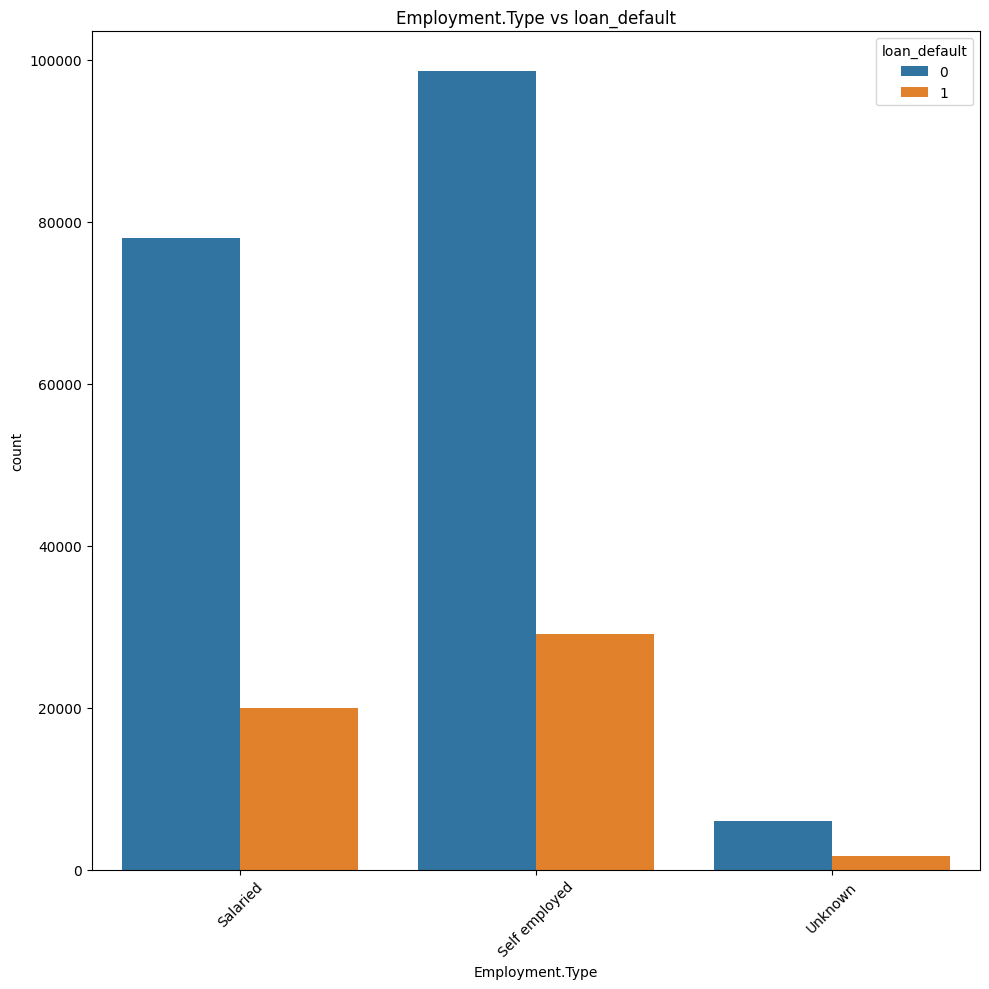

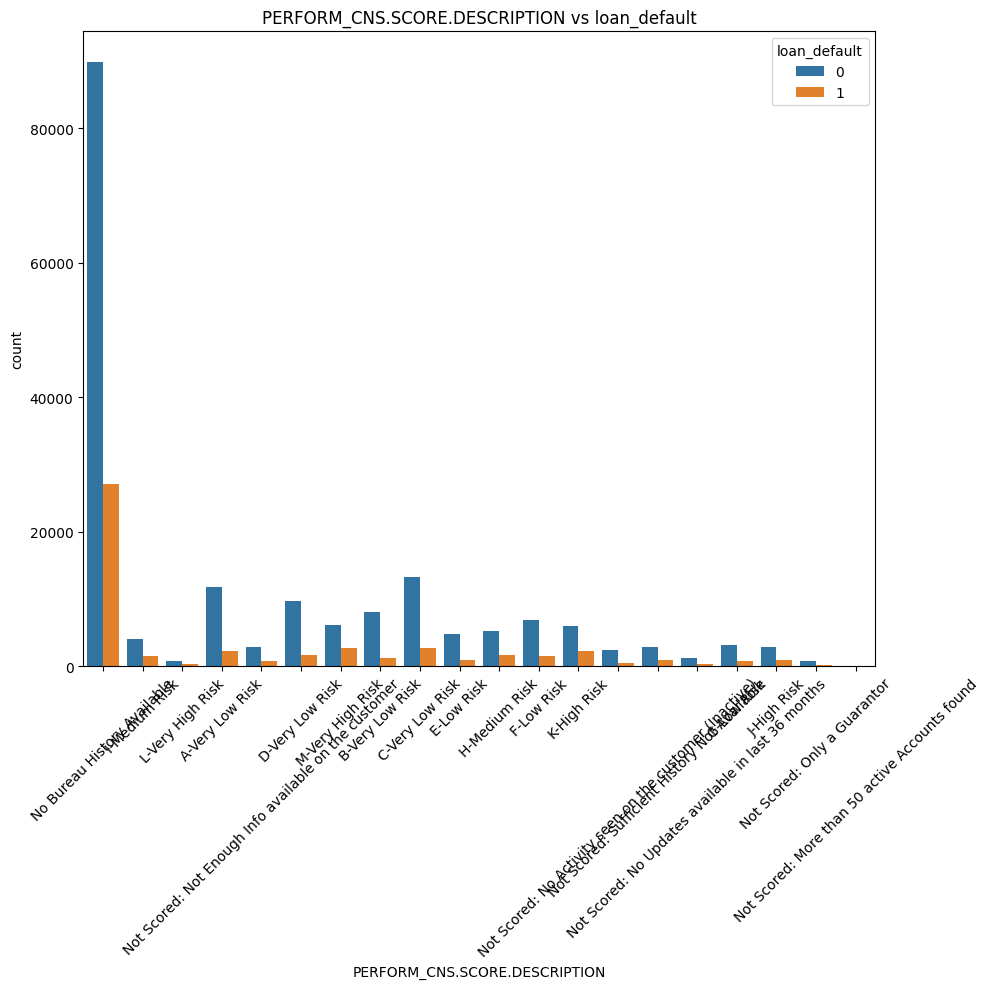

In [47]:
for col in cat_cols:
    plt.figure(figsize=(10,10))
    sns.countplot(
        data=data,
        x=col,
        hue='loan_default'
    )
    plt.title(f'{col} vs loan_default')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


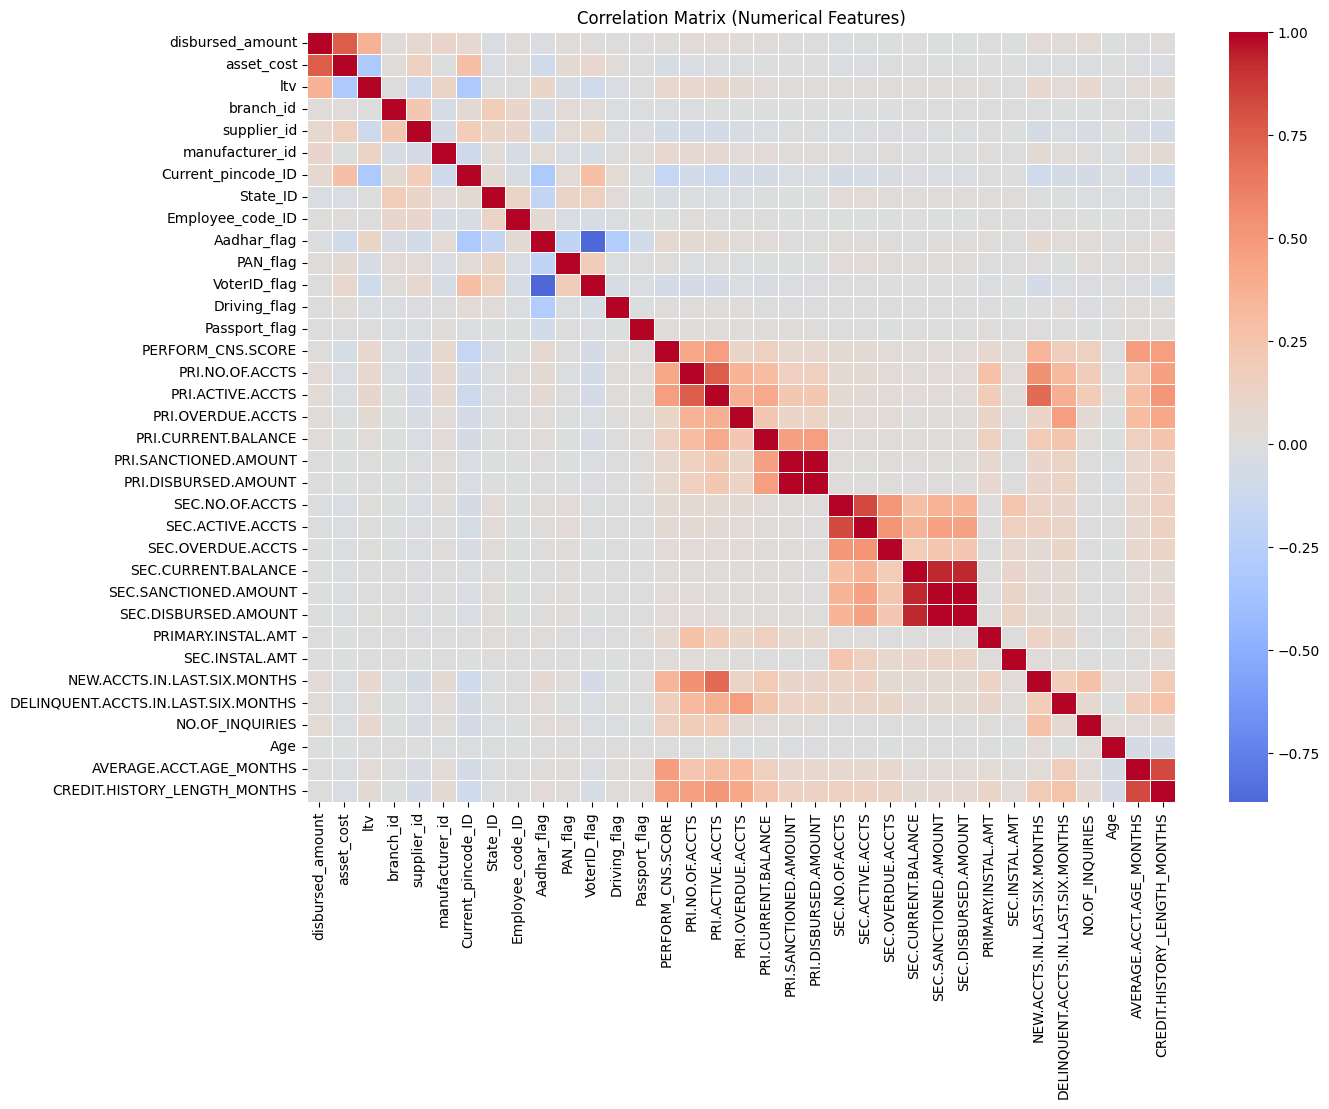

In [48]:
# Select numerical columns (exclude target)
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_default')

# Correlation matrix
corr_matrix = data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


In [49]:
num_cols


Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'Age',
       'AVERAGE.ACCT.AGE_MONTHS', 'CREDIT.HISTORY_LENGTH_MONTHS'],
      dtype='object')

In [50]:
pair_cols = ['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'Age',
       'AVERAGE.ACCT.AGE_MONTHS', 'CREDIT.HISTORY_LENGTH_MONTHS','loan_default']

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [52]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Age,Disbursal_Month,AVERAGE.ACCT.AGE_MONTHS,CREDIT.HISTORY_LENGTH_MONTHS
0,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,0,41,8,0,0
1,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,1991,0,0,1,0,1,40,9,23,23
2,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,0,40,8,0,0
3,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,31,0,0,0,1,1,31,10,8,15
4,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,1,1,48,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,Salaried,6,3705,...,4084,0,0,0,0,0,37,10,21,39
233150,73651,100600,74.95,34,23775,51,990,Self employed,6,3705,...,1565,0,0,0,0,0,37,10,6,6
233151,33484,71212,48.45,77,22186,86,2299,Salaried,4,3479,...,0,0,0,0,0,0,49,10,0,0
233152,34259,73286,49.10,77,22186,86,2299,Salaried,4,3479,...,0,0,0,0,0,0,31,9,0,0


In [53]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_default')


In [54]:
id_like_cols = [
    'branch_id',
    'supplier_id',
    'manufacturer_id',
    'Current_pincode_ID',
    'Employee_code_ID'
]

num_cols = num_cols.drop([c for c in id_like_cols if c in num_cols])


In [55]:
X_vif = data[num_cols].fillna(0)


In [56]:
vif_df = pd.DataFrame()
vif_df['feature'] = X_vif.columns
vif_df['VIF'] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_df.sort_values(by='VIF', ascending=False)


,feature,VIF
20,SEC.SANCTIONED.AMOUNT,1547.678938
21,SEC.DISBURSED.AMOUNT,1543.244426
15,PRI.DISBURSED.AMOUNT,413.401110
14,PRI.SANCTIONED.AMOUNT,410.813495
0,disbursed_amount,129.422703
2,ltv,88.402626
1,asset_cost,84.194044
4,Aadhar_flag,45.246122
6,VoterID_flag,7.655049
19,SEC.CURRENT.BALANCE,7.611658


In [57]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION'], dtype='object')

In [58]:
data[['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION']].nunique()


Employment.Type                   3
PERFORM_CNS.SCORE.DESCRIPTION    20
dtype: int64

In [59]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()


PERFORM_CNS.SCORE.DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [60]:
def bin_cns_score(val):
    if pd.isna(val):
        return 'No_History'
    
    val = val.lower()
    
    if 'very low risk' in val:
        return 'Very_Low'
    elif 'low risk' in val:
        return 'Low'
    elif 'medium risk' in val:
        return 'Medium'
    elif 'high risk' in val and 'very high' not in val:
        return 'High'
    elif 'very high risk' in val:
        return 'Very_High'
    else:
        return 'No_History'


In [61]:
data['CNS_SCORE_BINNED'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].apply(bin_cns_score)


In [62]:
data['CNS_SCORE_BINNED'].value_counts()


CNS_SCORE_BINNED
No_History    129785
Very_Low       50728
Low            18294
Medium         12412
High           12025
Very_High       9910
Name: count, dtype: int64

In [63]:
data.drop(columns=['PERFORM_CNS.SCORE.DESCRIPTION'], inplace=True)


In [64]:
risk_map = {
    'Very_Low': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Very_High': 5,
    'No_History': 3
}

data['CNS_SCORE_BINNED'] = data['CNS_SCORE_BINNED'].map(risk_map)


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_ID                   233154 non-null  int64  
 7   Employment.Type                      233154 non-null  object 
 8   State_ID                             233154 non-null  int64  
 9   Employee_code_ID                     233154 non-null  int64  
 10  Aadhar_flag                          233154 non-null  int64  
 11  PAN_flag     

In [66]:
from sklearn.preprocessing import LabelEncoder

le_emp = LabelEncoder()
data['Employment.Type'] = le_emp.fit_transform(data['Employment.Type'])


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_ID                   233154 non-null  int64  
 7   Employment.Type                      233154 non-null  int64  
 8   State_ID                             233154 non-null  int64  
 9   Employee_code_ID                     233154 non-null  int64  
 10  Aadhar_flag                          233154 non-null  int64  
 11  PAN_flag     

In [68]:
data['Employment.Type'].value_counts()
data[['Employment.Type']].head()


,Employment.Type
0,0
1,1
2,1
3,1
4,1


In [69]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['loan_default'])
y = data['loan_default']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186523, 38), (46631, 38), (186523,), (46631,))

In [71]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


loan_default
0    0.782934
1    0.217066
Name: proportion, dtype: float64

In [72]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [73]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.6436682639158264
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     36509
           1       0.44      0.03      0.06     10122

    accuracy                           0.78     46631
   macro avg       0.61      0.51      0.47     46631
weighted avg       0.71      0.78      0.70     46631



In [74]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance


,feature,importance
2,ltv,0.102708
0,disbursed_amount,0.095356
1,asset_cost,0.089910
6,Current_pincode_ID,0.088148
9,Employee_code_ID,0.079612
33,Age,0.076972
4,supplier_id,0.073450
3,branch_id,0.043209
15,PERFORM_CNS.SCORE,0.028571
8,State_ID,0.026589


In [75]:
low_importance_cols = [
    'SEC.NO.OF.ACCTS',
    'SEC.DISBURSED.AMOUNT',
    'SEC.SANCTIONED.AMOUNT',
    'SEC.CURRENT.BALANCE',
    'SEC.ACTIVE.ACCTS',
    'SEC.INSTAL.AMT',
    'SEC.OVERDUE.ACCTS',
    'Passport_flag',
    'Driving_flag'
]

data_reduced = data.drop(columns=low_importance_cols)


In [76]:
X = data_reduced.drop(columns=['loan_default'])
y = data_reduced['loan_default']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [77]:
rf_model_2 = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model_2.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [78]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf_model_2.predict(X_test)
y_prob = rf_model_2.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.6437037982406095
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     36509
           1       0.43      0.03      0.06     10122

    accuracy                           0.78     46631
   macro avg       0.61      0.51      0.47     46631
weighted avg       0.71      0.78      0.70     46631



In [79]:
rf_model_weighted = RandomForestClassifier(
    n_estimators=300,
    class_weight={0: 1, 1: 4},  # force focus on defaulters
    random_state=42,
    n_jobs=-1
)

rf_model_weighted.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [80]:
y_prob = rf_model_weighted.predict_proba(X_test)[:, 1]


In [81]:

threshold = 0.3
y_pred_custom = (y_prob >= threshold).astype(int)

In [82]:
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_custom))

ROC-AUC: 0.6425503648552385
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     36509
           1       0.35      0.32      0.33     10122

    accuracy                           0.72     46631
   macro avg       0.58      0.58      0.58     46631
weighted avg       0.71      0.72      0.72     46631



In [88]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight


np.float64(3.6067573908962927)

In [89]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)


In [90]:
xgb_model.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [91]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.6648123088140891
              precision    recall  f1-score   support

           0       0.86      0.60      0.71     36509
           1       0.31      0.64      0.41     10122

    accuracy                           0.61     46631
   macro avg       0.58      0.62      0.56     46631
weighted avg       0.74      0.61      0.64     46631



In [ ]:
threshold = 0.3
y_pred_final = (y_prob >= threshold).astype(int)


In [93]:
xgb_model_reg = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    min_child_weight=50,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

xgb_model_reg.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [94]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.6648123088140891
              precision    recall  f1-score   support

           0       0.86      0.60      0.71     36509
           1       0.31      0.64      0.41     10122

    accuracy                           0.61     46631
   macro avg       0.58      0.62      0.56     46631
weighted avg       0.74      0.61      0.64     46631



In [107]:
final_threshold = 0.3


In [108]:
import joblib

joblib.dump(final_xgb, 'loan_default_xgb_final.pkl')
joblib.dump(final_threshold, 'loan_default_threshold.pkl')
joblib.dump(X_train.columns.tolist(), 'model_features.pkl')



['model_features.pkl']